# Capstone Project - Boil Order Classifier
### Author: Chris Mantell

**1. Data Acquistion**

The dataset for this capstone comes from the HealthMap, an epidemiological and disease surveillance tool that monitors content from many different sources for information on infectious disease outbreaks. 

The HealthMap automatically pulls in content from the web every hour from many different sources and an algorithm classifies the content by disease, location, and affected species.  The content is then curated, usually within 24 hours of being pulled into the system, by people with infectious disease knowledge to obtain further precision in location and/or to correct misclassifications by the algorith.  

This particular dataset is about all "Waterborne Illness" alerts coming from the Google News English feed from 5/10/2010 - 10/27/2017.  These alerts include boil order alerts (the target) but also alerts relating to bacteria in water supplies or other topics will not be used.  Further data curation needs to be done to classify boil order alerts from the entire dataset.  This will be done by myself, who has domain understanding as a previous worker with the HealthMap.

**Data Dictionary (Feature Name: Discription)**

> "Location" : Location of where the alert is referencing.  Locations can be a country, state/province, county, town.

> "Country": Country where the alert is referencing.

> "Disease": Disease that the alert is referencing.  This should all be "Waterborne Illness"

> "HM Alert": HealthMap Alert - the unique ID for alert.

> "Headline": The headline of the news article that the alert references.

> "URL": The URL for the news article that the alert references.  The HealthMap also saves the HTML of each alert on their server in the event that webpages are removed or go down.  Therefore, news articles can always be accessed if need be.

> "Issue Date": The date and time the web article was published.

> "Alert Tag": The classification of the type of alert:
>> "Breaking": Alerts about outbreaks currently happening or updates on outbreaks currently happening.

>> "Warning": Alerts about outbreaks that may happen soon.

>> "Old News": Alerts referencing outbreaks in the past.

>> "Content": Alerts referencing information about infectious disease or outbreaks, but not about the outbreak itself.

>> "NDR": Not Disease Related.

>> "No Tag": No tag indicated.  Most likely due to human error or because the alert has yet to be curated.

> "Dup Count": The number of duplicate articles or "children" under the alert.

> "Long": The longitude of the alert location.

> "Lat": The latitude of the alert location.

> "Smooshed Parser Extract": Automated extraction of the text of the article.  This is most likely the text that the algorith uses to classify the alert.

> "Place Categories": An extra categorization column to help give more information about the alert.  This can be assigned by the human curator or by the algorithm.  Ex: An alert about elementary school kids drinking water with a high lead content may have a Place Category of "School II: elementary + high school.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Load the data
df = pd.read_csv('./HealthMap_Waterborne_2010-2017-GNE_US.csv', encoding='latin-1')
df.head()

Location        Country             Disease Species  \
0      Delaware, United States  United States  Waterborne Illness  Humans   
1      Kentucky, United States  United States  Waterborne Illness  Humans   
2                  Puerto Rico  United States  Waterborne Illness  Humans   
3      Michigan, United States  United States  Waterborne Illness  Humans   
4  Pennsylvania, United States  United States  Waterborne Illness  Humans   

   HM Alert ID                                           Headline  \
0      5407609  Kutcher tells Council about water situation - ...   
1      5407269  Under boil order, Murray awaits water test res...   
2      5405438  Puerto Ricans at Risk of Waterborne Disease Ou...   
3      5404851  Howes: In Flint water war, city only has one c...   
4      5404604  DEP orders PWSA to make critical infrastrucure...   

                                                 URL      Issue Date  \
0  http://news.google.com/news/url?sa=t&fd=R&ct2=...   10/27/17 1:11   
1  http://news.google.com/news/url?sa=t&fd=R&ct2=...  10/26/17 18:33   
2  http://news.google.com/news/url?sa=t&fd=R&ct2=...   10/26/17 7:20   
3  http://news.google.com/news/url?sa=t&fd=R&ct2=...   10/26/17 0:02   
4  http://news.google.com/news/url?sa=t&fd=R&ct2=...  10/25/17 18:19   

  Alert Tag Dup Count     ...      Unnamed: 109 Unnamed: 110 Unnamed: 111  \
0  Breaking         0     ...               NaN          NaN          NaN   
1  Breaking         8     ...               NaN          NaN          NaN   
2   Warning         0     ...               NaN          NaN          NaN   
3  Breaking         1     ...               NaN          NaN          NaN   
4  Breaking         0     ...               NaN          NaN          NaN   

  Unnamed: 112 Unnamed: 113 Unnamed: 114 Unnamed: 115 Unnamed: 116  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

  Unnamed: 117 Unnamed: 118  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN  

[5 rows x 119 columns]

In [3]:
df.dtypes

Location                    object
Country                     object
Disease                     object
Species                     object
HM Alert ID                  int64
Headline                    object
URL                         object
Issue Date                  object
Alert Tag                   object
Dup Count                   object
Long                        object
Lat                         object
Smooshed Parser Extract     object
Place Categories            object
Unnamed: 14                 object
Unnamed: 15                 object
Unnamed: 16                 object
Unnamed: 17                 object
Unnamed: 18                 object
Unnamed: 19                 object
Unnamed: 20                 object
Unnamed: 21                 object
Unnamed: 22                 object
Unnamed: 23                 object
Unnamed: 24                 object
Unnamed: 25                 object
Unnamed: 26                 object
Unnamed: 27                 object
Unnamed: 28         

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7725 entries, 0 to 7724
Columns: 119 entries, Location to Unnamed: 118
dtypes: float64(9), int64(1), object(109)
memory usage: 7.0+ MB


In [5]:
df.iloc[:, 14:].isnull().sum()

Unnamed: 14     7724
Unnamed: 15     7724
Unnamed: 16     7724
Unnamed: 17     7724
Unnamed: 18     7724
Unnamed: 19     7724
Unnamed: 20     7724
Unnamed: 21     7724
Unnamed: 22     7724
Unnamed: 23     7724
Unnamed: 24     7724
Unnamed: 25     7724
Unnamed: 26     7724
Unnamed: 27     7724
Unnamed: 28     7724
Unnamed: 29     7724
Unnamed: 30     7724
Unnamed: 31     7724
Unnamed: 32     7724
Unnamed: 33     7724
Unnamed: 34     7724
Unnamed: 35     7724
Unnamed: 36     7724
Unnamed: 37     7724
Unnamed: 38     7724
Unnamed: 39     7724
Unnamed: 40     7724
Unnamed: 41     7724
Unnamed: 42     7724
Unnamed: 43     7724
                ... 
Unnamed: 89     7724
Unnamed: 90     7724
Unnamed: 91     7724
Unnamed: 92     7724
Unnamed: 93     7724
Unnamed: 94     7724
Unnamed: 95     7724
Unnamed: 96     7724
Unnamed: 97     7724
Unnamed: 98     7724
Unnamed: 99     7724
Unnamed: 100    7724
Unnamed: 101    7724
Unnamed: 102    7724
Unnamed: 103    7724
Unnamed: 104    7724
Unnamed: 105 

In [6]:
df.shape

(7725, 119)

In [7]:
df.isnull().sum()

Location                      0
Country                       0
Disease                       0
Species                       0
HM Alert ID                   0
Headline                      0
URL                           0
Issue Date                    0
Alert Tag                     0
Dup Count                     0
Long                          0
Lat                           0
Smooshed Parser Extract    2554
Place Categories           7531
Unnamed: 14                7724
Unnamed: 15                7724
Unnamed: 16                7724
Unnamed: 17                7724
Unnamed: 18                7724
Unnamed: 19                7724
Unnamed: 20                7724
Unnamed: 21                7724
Unnamed: 22                7724
Unnamed: 23                7724
Unnamed: 24                7724
Unnamed: 25                7724
Unnamed: 26                7724
Unnamed: 27                7724
Unnamed: 28                7724
Unnamed: 29                7724
                           ... 
Unnamed:

In [8]:
df['Unnamed: 14'].isnull().sum()

7724

In [9]:
df.iloc[:, 14:].head()

Unnamed: 14 Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18 Unnamed: 19  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23     ...      Unnamed: 109  \
0         NaN         NaN         NaN         NaN     ...               NaN   
1         NaN         NaN         NaN         NaN     ...               NaN   
2         NaN         NaN         NaN         NaN     ...               NaN   
3         NaN         NaN         NaN         NaN     ...               NaN   
4         NaN         NaN         NaN         NaN     ...               NaN   

  Unnamed: 110 Unnamed: 111 Unnamed: 112 Unnamed: 113 Unnamed: 114  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

  Unnamed: 115 Unnamed: 116 Unnamed: 117 Unnamed: 118  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN  

[5 rows x 105 columns]

In [10]:
columns_to_drop = [col for col in df.iloc[:, 14:].columns]

In [11]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [12]:
# Lots of missing texts in Smooshed Parser Extract.  Will have to grab some from manual curation.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7725 entries, 0 to 7724
Data columns (total 14 columns):
Location                   7725 non-null object
Country                    7725 non-null object
Disease                    7725 non-null object
Species                    7725 non-null object
HM Alert ID                7725 non-null int64
Headline                   7725 non-null object
URL                        7725 non-null object
Issue Date                 7725 non-null object
Alert Tag                  7725 non-null object
Dup Count                  7725 non-null object
Long                       7725 non-null object
Lat                        7725 non-null object
Smooshed Parser Extract    5171 non-null object
Place Categories           194 non-null object
dtypes: int64(1), object(13)
memory usage: 845.0+ KB


In [13]:
df['Species'].value_counts()

Humans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             7724
 CRUEL CONTENT*** THIRD classmate dies as hateful online rantings of Ohio... A brief history of the time Stephen Hawking went to a sex... Sexpresso: Wives ban their husbands from visiting Italian... Race against the tide: Bravery of young mother who stayed by... Photo of gay marine leaping into the arms of his boyfriend... Airport emergency in New Jersey as 'landing gear problem'..

In [14]:
# Strange row - possible reason for many unnammed columns.  Will drop
df.loc[(df['Species'] != 'Humans')]

Location  \
6997   - was thwarted this year after animal rights ...   

                                                Country  \
6997   the dogs are simply thrown into the water and...   

                                                Disease  \
6997   but it is better than it was. 'Some of these ...   

                                                Species  HM Alert ID  \
6997   CRUEL CONTENT*** THIRD classmate dies as hate...           70   

                                               Headline  \
6997   as he is handed sex... 'It came so close it s...   

                                                    URL       Issue Date  \
6997   or debate this issue live on our message boar...   the other side   

                                            Alert Tag  \
6997   28/2/2012 20:30 Human beings again being cruel   

                                 Dup Count   Long  \
6997   they should wipe out the human race   they   

                                     Lat Smooshed Parser Extract  \
6997  re just getting worse!!!! - elaine          worcestershire   

                                       Place Categories  
6997   28/2/2012 20:29 You'll be sorry when you or a...

In [15]:
df.drop(6997, axis=0, inplace=True)

In [16]:
df['Alert Tag'].value_counts()

Warning     5791
Context     1810
Breaking     121
No Tag         2
Name: Alert Tag, dtype: int64

In [17]:
#Will have to update and check.  Seems like this alert was not curated or mistakenly classified.
df.loc[(df['Alert Tag'] == "No Tag")]

Location        Country  \
592  Henderson, North Carolina, United States  United States   
593     Oxford, North Carolina, United States  United States   

                Disease Species  HM Alert ID  \
592  Waterborne Illness  Humans      5086090   
593  Waterborne Illness  Humans      5086090   

                                              Headline  \
592  Henderson, Vance County under mandatory water ...   
593  Henderson, Vance County under mandatory water ...   

                                                   URL    Issue Date  \
592  http://news.google.com/news/url?sa=t&fd=R&ct2=...  6/5/17 19:27   
593  http://news.google.com/news/url?sa=t&fd=R&ct2=...  6/5/17 19:27   

    Alert Tag Dup Count        Long        Lat Smooshed Parser Extract  \
592    No Tag         5  -78.403984  36.329388                     NaN   
593    No Tag         5  -78.590828  36.310699                     NaN   

    Place Categories  
592              NaN  
593              NaN

In [18]:
for i in df['Alert Tag'].value_counts():
    print(i)

5791
1810
121
2


In [19]:
counts = [i for i in df['Alert Tag'].value_counts()]
counts

[5791, 1810, 121, 2]

In [20]:
tags = ('Warning', 'Context', 'Breaking', 'No Tag')
tags

('Warning', 'Context', 'Breaking', 'No Tag')

In [21]:
df['Alert Tag'].value_counts()

Warning     5791
Context     1810
Breaking     121
No Tag         2
Name: Alert Tag, dtype: int64

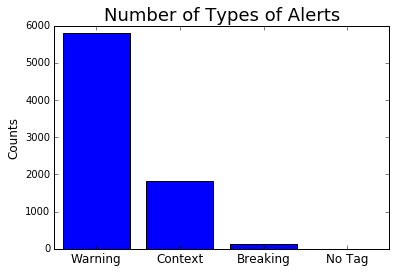

In [22]:
plt.bar(np.arange(len(tags)), counts, align='center')
plt.xticks(np.arange(len(tags)), tags, fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Number of Types of Alerts', fontsize=18)

**Most alerts should be in the Warning Tag**

In [28]:
df.loc[(df['URL'].duplicated())]

Location        Country  \
118              Rocky Neck, Connecticut, United States  United States   
119      Silver Sands Beach, Connecticut, United States  United States   
120         Wadsworth Falls, Connecticut, United States  United States   
122                 Milford, Connecticut, United States  United States   
123               East Lyme, Connecticut, United States  United States   
125   Oak Beach County Park, Port Austin, Michigan, ...  United States   
126   Thompson County Park, Caseville, Michigan, Uni...  United States   
136                     Jupiter, Florida, United States  United States   
154   Silver Sands State Park, Connecticut, United S...  United States   
155   Indian Well State Park, Connecticut, United St...  United States   
165               Silver Lake, Wisconsin, United States  United States   
166    Center Lake, Camp Lake, Wisconsin, United States  United States   
167                 Wheatland, Wisconsin, United States  United States   
168                   Bristol, Wisconsin, United States  United States   
201                        Rayland, Ohio, United States  United States   
211            Lake Ronkonkoma, New York, United States  United States   
221         Saint Clair Shores, Michigan, United States  United States   
231                 Stillwater, New York, United States  United States   
232                   Halfmoon, New York, United States  United States   
233               Schaghticoke, New York, United States  United States   
253              Saline County, Illinois, United States  United States   
271           Santa Cruz County, Arizona, United States  United States   
275        North Kingstown, Rhode Island, United States  United States   
276             Middletown, Rhode Island, United States  United States   
288        North Kingstown, Rhode Island, United States  United States   
289             Portsmouth, Rhode Island, United States  United States   
296             Middletown, Rhode Island, United States  United States   
297             Barrington, Rhode Island, United States  United States   
298                 Warren, Rhode Island, United States  United States   
301   Amityville Beach, Amityville, New York, United...  United States   
...                                                 ...            ...   
6607            Harsens Island, Michigan, United States  United States   
6661          Altamonte Springs, Florida, United States  United States   
6774             Honesdale, Pennsylvania, United States  United States   
6780             Honesdale, Pennsylvania, United States  United States   
6915                      Boardman, Ohio, United States  United States   
7110  White Sulphur Springs, West Virginia, United S...  United States   
7136                    Milton, New York, United States  United States   
7146          Alexander County, Illinois, United States  United States   
7173                New Llano, Louisiana, United States  United States   
7195                   Victory, New York, United States  United States   
7230             Hardin County, Illinois, United States  United States   
7281                      Miami, Florida, United States  United States   
7311           Hinds County, Mississippi, United States  United States   
7380                  Brighton, Illinois, United States  United States   
7387            Barkhamsted, Connecticut, United States  United States   
7503                   Nichols, New York, United States  United States   
7504                     Tioga, New York, United States  United States   
7525                  Summit, New Jersey, United States  United States   
7526               Irvington, New Jersey, United States  United States   
7534                        Perry, Maine, United States  United States   
7535               Pleasant Point, Maine, United States  United States   
7543                  Bell County, Texas, United States  United States   
7544                       Burnet, Texas, United St

In [23]:
# Extract boil order related alerts


' XXXXXX Murray Ledger and Times'

In [2]:
#Use regex to get boil orders from headlines.   
#web scraper to pull boil order - need BS 
import requests
from bs4 import BeautifulSoup

In [29]:
df.shape

(7724, 14)

In [30]:
df.head()

Location        Country             Disease Species  \
0      Delaware, United States  United States  Waterborne Illness  Humans   
1      Kentucky, United States  United States  Waterborne Illness  Humans   
2                  Puerto Rico  United States  Waterborne Illness  Humans   
3      Michigan, United States  United States  Waterborne Illness  Humans   
4  Pennsylvania, United States  United States  Waterborne Illness  Humans   

   HM Alert ID                                           Headline  \
0      5407609  Kutcher tells Council about water situation - ...   
1      5407269  Under boil order, Murray awaits water test res...   
2      5405438  Puerto Ricans at Risk of Waterborne Disease Ou...   
3      5404851  Howes: In Flint water war, city only has one c...   
4      5404604  DEP orders PWSA to make critical infrastrucure...   

                                                 URL      Issue Date  \
0  http://news.google.com/news/url?sa=t&fd=R&ct2=...   10/27/17 1:11   
1  http://news.google.com/news/url?sa=t&fd=R&ct2=...  10/26/17 18:33   
2  http://news.google.com/news/url?sa=t&fd=R&ct2=...   10/26/17 7:20   
3  http://news.google.com/news/url?sa=t&fd=R&ct2=...   10/26/17 0:02   
4  http://news.google.com/news/url?sa=t&fd=R&ct2=...  10/25/17 18:19   

  Alert Tag Dup Count        Long        Lat  \
0  Breaking         0    -75.4981    38.9935   
1  Breaking         8  -84.462898  37.439899   
2   Warning         0  -66.501404  18.251301   
3  Breaking         1  -84.462898  43.580299   
4  Breaking         0  -77.475601  40.930099   

                             Smooshed Parser Extract          Place Categories  
0                     XXXXXX Murray Ledger and Times                       NaN  
1                                XXXXXX WPSD Local 6                       NaN  
2   XXXXXX Close Embed this video  More videos (1...  Natural disaster related  
3   XXXXXX FacebookEmail Twitter Google+ LinkedIn...                       NaN  
4   XXXXXX {copyShortcut} to copy Link copied! Up...                       NaN

In [31]:
df.Headline[0]

'Kutcher tells Council about water situation - Murray Ledger and Times'

In [42]:
soups[0]

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<!--[if lt IE 7 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie6 "> <![endif]--><!--[if IE 7 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie7 "> <![endif]--><!--[if IE 8 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie8 "> <![endif]--><!--[if IE 9 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie9 "> <![endif]--><!--[if (gt IE 9)|!(IE)]><!--><html class="" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#"> <!--<![endif]-->
<head>
<base href="http://murrayledger.com/content/tncms/live/"/>
<meta content="noarchive" name="googlebot"/>
<meta content="MURRAY — City of Murray Director of Public Works &amp;amp; Utilities Tom Kutcher updated Mayor Jack Rose and the members of the city council Thursday about the ongoi

In [27]:
url = df.URL[0]
url

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGmA0yAoTj-LEPjIRxm5NB9akVvVw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779651867230&ei=Cc7yWaC_H9G7zAKcpws&url=http://murrayledger.com/news/kutcher-tells-council-about-water-situation/article_2020569a-bac6-11e7-82f8-1f4b918f38ae.html'

In [28]:
res = requests.get(url)
res.status_code

200

In [29]:
soup = BeautifulSoup(res.content, 'lxml')

In [91]:
df.URL.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7715, 7716, 7717, 7718, 7719, 7720, 7721, 7722, 7723, 7724],
           dtype='int64', length=7724)

In [ ]:
def get_soups(df, column, index):
    soups = 
    counter = 0
    for index, url in enumerate(df.URL):    
    res = requests.get(url)
    if res.status_code == 404 or res.status_code == 410:
        df.at['index', 'URL'] == 'delete' 
    elif res.status_code != 200:
        print('Failed! Status code: ', res.status_code)
        print(index, url)
        continue
    else:
        pass
    soup = BeautifulSoup(res.content, 'lxml')
    soups.append(soup)
    counter += 1
    time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

In [3]:
import time

In [25]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    res = requests.get(url)
    counter += 1
    if res.status_code == 404 or res.status_code == 410:
        df.at[index, 'URL'] = 'deleted'
        print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
        print(url)
    elif res.status_code != 200:
        print('Failed! Status code: ', res.status_code)
        print(index, url)
    else:
        soup = BeautifulSoup(res.content, 'lxml')
        soups[index] = soup
        time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

Failed! Status code:  403
18 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNE1ftT7ndvpyp9m53cCdop1iHxkSA&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=OVPiWaiZD9bUzAKg7rq4Cw&url=https://ocmonitor.com/2017/10/14/psc-ends-redundant-reporting-requirement/
Failed!  Status code:  404 Deleted URL @ index:  23
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFMEQbuq-swLVt1OCA2TgN-jgv05Q&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779634289852&ei=Ms_eWaCeKoPP3gH74LHoAQ&url=http://www.kmvt.com/content/news/About-100-Jerome-homes-under-boil-order-450494433.html
Failed!  Status code:  404 Deleted URL @ index:  46
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEZtzZjMBTboMy0ZJuNLvdqgVqvFg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779616411416&ei=RUzHWbjsN8TP3AHPgqXoDg&url=http://www.wibw.com/content/news/Boil-order-for-the-City-of-Mayetta-Jackson-Co-lifted-447210293.html
Failed!  Status code:  404 Deleted URL @ index:  55
http://news.google.com/news/url?sa=t&fd=R&ct2

ConnectionError: HTTPConnectionPool(host='www.', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000195C1A705C0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [26]:
soups.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,

In [27]:
#check index 873 - failed - max retries? 
# Found DNS address can't be reached.  Gives this url: http://www./#2/67672274-3a3c-5d7c-8d5d-7755ad88fbce.html
df.URL[873]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNER20aDIS3C1S-_iOWzSBW1ONeArw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779345432417&ei=YZR5WODcKoOh3gGGy73IAQ&url=http://www.fayobserver.com/news/local/overhills-boil-water-advisory-rescinded-no-coliform-bacteria-found/article_67672274-3a3c-5d7c-8d5d-7755ad88fbce.html'

In [28]:
batch1 = pd.DataFrame()
batch1['index'] = soups.keys()
batch1['HTML'] = soups.values()

batch1.to_csv('./batch1.csv')
df.to_csv('./HealthMap_Partial.csv')

In [12]:
df.loc[(df['URL'] == 'deleted')].shape

(16, 14)

In [4]:
df = pd.read_csv('./HealthMap_Partial.csv')
df.head()

Unnamed: 0                     Location        Country             Disease  \
0           0      Delaware, United States  United States  Waterborne Illness   
1           1      Kentucky, United States  United States  Waterborne Illness   
2           2                  Puerto Rico  United States  Waterborne Illness   
3           3      Michigan, United States  United States  Waterborne Illness   
4           4  Pennsylvania, United States  United States  Waterborne Illness   

  Species  HM Alert ID                                           Headline  \
0  Humans      5407609  Kutcher tells Council about water situation - ...   
1  Humans      5407269  Under boil order, Murray awaits water test res...   
2  Humans      5405438  Puerto Ricans at Risk of Waterborne Disease Ou...   
3  Humans      5404851  Howes: In Flint water war, city only has one c...   
4  Humans      5404604  DEP orders PWSA to make critical infrastrucure...   

                                                 URL      Issue Date  \
0  http://news.google.com/news/url?sa=t&fd=R&ct2=...   10/27/17 1:11   
1  http://news.google.com/news/url?sa=t&fd=R&ct2=...  10/26/17 18:33   
2  http://news.google.com/news/url?sa=t&fd=R&ct2=...   10/26/17 7:20   
3  http://news.google.com/news/url?sa=t&fd=R&ct2=...   10/26/17 0:02   
4  http://news.google.com/news/url?sa=t&fd=R&ct2=...  10/25/17 18:19   

  Alert Tag  Dup Count       Long        Lat  \
0  Breaking          0 -75.498100  38.993500   
1  Breaking          8 -84.462898  37.439899   
2   Warning          0 -66.501404  18.251301   
3  Breaking          1 -84.462898  43.580299   
4  Breaking          0 -77.475601  40.930099   

                             Smooshed Parser Extract          Place Categories  
0                     XXXXXX Murray Ledger and Times                       NaN  
1                                XXXXXX WPSD Local 6                       NaN  
2   XXXXXX Close Embed this video  More videos (1...  Natural disaster related  
3   XXXXXX FacebookEmail Twitter Google+ LinkedIn...                       NaN  
4   XXXXXX {copyShortcut} to copy Link copied! Up...                       NaN

In [8]:
df.drop(df.columns[0], axis=1, inplace=True)

In [29]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 873:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

Failed!  Status code:  404 Deleted URL @ index:  880
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHzcX86__RI0SDN9gkeZC7ZfoH52A&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779339286955&ei=oUh2WNCgJIO7pweE1Z_ICg&url=http://www.valleymorningstar.com/news/state/article_071214b4-c929-5d5b-94dc-bddb6ee97d70.html
Failed! Status code:  403
883 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEhGKGule8O6yQa9BIA6LJh5kHwpQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=o2d1WJiJJNOU3QGw14GQDQ&url=http://www.ellsworthamerican.com/maine-news/franklin-water-customers-boil-water-order/
Failed!  Status code:  404 Deleted URL @ index:  926
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGPhO-S9pFbzcf9amZuqpqa9ZTdBA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779317343241&ei=anRdWKDXF8Oh3gHg5JCABA&url=http://www.wcax.com/story/34121928/boil-water-order-lifted-in-addison-county
Failed! Status code:  403
933 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHwr0XoMmOBB

ConnectionError: HTTPConnectionPool(host='www.myjournalcourier.comnews', port=80): Max retries exceeded with url: /100517/pipe-damage-prompts-boil-advisory (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000195DA280358>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [30]:
soups.keys()

dict_keys([1024, 1025, 1026, 1027, 1028, 1029, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1063, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1089, 1091, 1092, 1093, 1094, 1095, 1096, 874, 875, 876, 877, 878, 879, 881, 882, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 927, 928, 929, 930, 931, 932, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 975, 976, 977, 978, 980, 981, 982, 983, 984, 985, 986, 987, 989, 990, 991, 992, 993, 994, 995, 996, 997, 99

In [31]:
#Check 1097 - max retries error
# DNS error.  Links to http://www.myjournalcourier.comnews/100517/pipe-damage-prompts-boil-advisory
# Seems that a '/' is missing between '.com' and 'news'.  Will work if added..
df.URL[1097]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFXe3J7FEpSxKdA0YWwXkU_un2ozQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=YFriV8jHCo6G3AG_26X4Ag&url=http://myjournalcourier.com/news/100517/pipe-damage-prompts-boil-advisory'

In [32]:
batch2 = pd.DataFrame()
batch2['index'] = soups.keys()
batch2['HTML'] = soups.values()

batch2.to_csv('./batch2.csv')
df.to_csv('./HealthMap_Partial.csv')

In [33]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1097:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0


ConnectionError: HTTPSConnectionPool(host='wabi.tv', port=443): Max retries exceeded with url: /2016/09/08/boil-water-order-for-parts-of-ellsworth/ (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x00000195DD59D780>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it',))

In [34]:
soups.keys()

dict_keys([1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113])

In [35]:
#Check index 1114 - Connection Refused Error
#Wabi.tv refused to connect
df.URL[1114]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFoqh_AT1VgMtjFGDzWKpVH1UVTHg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779205534879&ei=0_jSV-CtEMzI3QHWtoeoAg&url=https://wabi.tv/2016/09/08/boil-water-order-for-parts-of-ellsworth/'

In [36]:
batch3 = pd.DataFrame()
batch3['index'] = soups.keys()
batch3['HTML'] = soups.values()

batch3.to_csv('./batch3.csv')
df.to_csv('./HealthMap_Partial.csv')

In [37]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1114:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
Failed!  Status code:  404 Deleted URL @ index:  1130
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHE-oVEbbdIfqeCV_S9vK9VoUG93g&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779198135654&ei=yC7KV4i7I8ak3gH_mb_ADA&url=http://www.goskagit.com/news/state/water-safe-again-in-carbonado-after-drilling-accident/article_a8086b5c-5bc1-5232-a5ba-8453ff602243.html
Failed!  Status code:  404 Deleted URL @ index:  1133
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGqMps1yn1GTP65_FXbwwCuUJWHcg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779197860347&ei=iPbJV5nsA4SH3AHCoINQ&url=http://www.ccenterdispatch.com/news/state/article_c8b3e764-f679-519b-984e-ece8b7cc31f0.html
Failed!  Status code:  404 Deleted URL @ index:  1141
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEL7aJTTwbKq3ypU004O4__XUVzhQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779195556931&ei=mDfHV9CgJIKU3QGe-42YAQ&url=http://kwqc.com/2016/08/31/lake-storey-beach-closed-today-for-sanitary-reason

ConnectionError: HTTPConnectionPool(host='www.myjournalcourier.comnews', port=80): Max retries exceeded with url: /98996/boil-water-precaution-is-lifted (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000195E547D8D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [38]:
soups.keys()

dict_keys([1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1131, 1132, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1153, 1154, 1155, 1156, 1157, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209])

In [39]:
#Check 1210 - Max retries error
#DNS not found.  Links to: http://www.myjournalcourier.comnews/98996/boil-water-precaution-is-lifted
# Seems that a '/' is missing between '.com' and 'news'.  Will work if added..
df.URL[1210]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNH_OwH9B1C6bacxwHWJrIxP0yfWHQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=i_WsV7ixIdKf3wHyk43oCQ&url=http://myjournalcourier.com/news/98996/boil-water-precaution-is-lifted'

In [40]:
batch4 = pd.DataFrame()
batch4['index'] = soups.keys()
batch4['HTML'] = soups.values()

batch4.to_csv('./batch4.csv')
df.to_csv('./HealthMap_Partial.csv')

In [41]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1210:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
Failed!  Status code:  404 Deleted URL @ index:  1266
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEcNSCN8VCqooKAVLhL5wSEg6muxw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779167555328&ei=GIyWV9ivLNG43gHFuLigBw&url=http://baytownsun.com/texas_ap/article_ed3aebc9-31de-5fda-b190-68773caf156a.html
Failed!  Status code:  404 Deleted URL @ index:  1274
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEtdK9nkNqNmkzhOEhSDjkbHbsQug&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779165587551&ei=cXuSV8i7DpSL3AGV0ZHoAg&url=http://wbt.com/ramsey-creek-park-beach-closed-due-to-high-levels-of-fecal-matter/


ConnectionError: HTTPConnectionPool(host='www.', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196053F6860>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [42]:
soups.keys()

dict_keys([1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1275, 1276])

In [43]:
#Check URL 1277 - COnnection Error
# Bad link - returns bad URL: http://www./#2/df420466-4ed2-5513-a6f4-aedee1fd389e.html
df.URL[1277]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGFYi9-OA8yCewzNr97utvxRiniMQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=N0OSV8i3OcvepwfS5KwY&url=http://www.fayobserver.com/news/local/bladen-county-officials-testing-white-lake-for-ties-to-skin/article_df420466-4ed2-5513-a6f4-aedee1fd389e.html'

In [44]:
batch5 = pd.DataFrame()
batch5['index'] = soups.keys()
batch5['HTML'] = soups.values()

batch5.to_csv('./batch5.csv')
df.to_csv('./HealthMap_Partial.csv')

In [45]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1277:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
Failed!  Status code:  410 Deleted URL @ index:  1319
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNG0Q1iBqltTg0cunUGfa47Jd0DTkQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779157650938&ei=lkmGV6inNIWQ3AHeyrbwAw&url=http://www.fairfieldcitizenonline.com/news/texas/article/Corpus-Christi-names-new-city-manager-after-water-8356442.php
Failed!  Status code:  404 Deleted URL @ index:  1337
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHozfkEG9fVF8N3spYk49vLq9mA_Q&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779146850831&ei=dd95V4iRMYi_3gHnwo_oCg&url=http://kwgn.com/2016/07/02/boulder-reservoir-swim-beach-closed-sunday-hopefull-for-4th-of-july/
Failed!  Status code:  404 Deleted URL @ index:  1338
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHozfkEG9fVF8N3spYk49vLq9mA_Q&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779146850831&ei=9I14V5iMI9XG3gHDo4HoAg&url=http://kwgn.com/2016/07/02/boulder-reservoir-swim-beach-closed-sunday-hopefull-for-4th-of-j

ConnectionError: HTTPConnectionPool(host='www.myjournalcourier.comnews', port=80): Max retries exceeded with url: /97183/boil-order-lifted-for-city-residents (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001960C89DA20>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [46]:
soups.keys()

dict_keys([1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1339, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1278, 1279])

In [47]:
#Check 1361 - Connection error
#DNS not found.  Links me to: http://www.myjournalcourier.comnews/97183/boil-order-lifted-for-city-residents
#Seems that forward slash is missing between .com and news.  Will work if added..
df.URL[1361]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEb-A1FREPrid5ARTh5T_42Nr-1dw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779142850784&ei=VH10V8CgCoy23gHClKSgDQ&url=http://myjournalcourier.com/news/97183/boil-order-lifted-for-city-residents'

In [48]:
batch6 = pd.DataFrame()
batch6['index'] = soups.keys()
batch6['HTML'] = soups.values()

batch6.to_csv('./batch6.csv')
df.to_csv('./HealthMap_Partial.csv')

In [49]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1361:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0


ConnectionError: HTTPConnectionPool(host='www.myjournalcourier.comnews', port=80): Max retries exceeded with url: /97133/city-under-immediate-water-emergency (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001960CD42710>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [50]:
soups.keys()

dict_keys([1362, 1363, 1364, 1365, 1366])

In [51]:
#Check 1367.  Connection error
#DNS not found.  Links me to : http://www.myjournalcourier.comnews/97133/city-under-immediate-water-emergency
#Seems that forward slash is missing between .com and news.  Will work if added..
df.URL[1367]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEHYuqOH0hohOM9JGlV6TkVFCuVYg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779142850784&ei=EYNyV-C7NYeM3wGD74XYBw&url=http://myjournalcourier.com/news/97133/city-under-immediate-water-emergency'

In [52]:
batch7 = pd.DataFrame()
batch7['index'] = soups.keys()
batch7['HTML'] = soups.values()

batch7.to_csv('./batch7.csv')
df.to_csv('./HealthMap_Partial.csv')

In [53]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1367:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
Failed! Status code:  403
1370 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGOvki3AUyNKCnaVnF_Rwt0DZNB8A&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=7IVxV6qQEtLP3QGMroyoBQ&url=http://www.kirklandreporter.com/news/384537681.html
Failed!  Status code:  404 Deleted URL @ index:  1381
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHJI9hI0jv8tbPRFXp_QYfn9R7PYw&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=-9doV-jUEI3U3gHTlJzoDA&url=http://www.citizen.com/news/2016-06-21/Local/Boil_Water_order_remains_in_effect_for_Mallards_La.html
Failed!  Status code:  404 Deleted URL @ index:  1382
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHTDdMzsjO-rJgAZ-lg8fqN8f2aOA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779136361067&ei=e2doV9ieCIjZ3gHQ-JuwCQ&url=http://salina.com/news/local/boil-water-order-issued-for-howison-heights/article_d7151843-8b3f-5ee0-ad83-45bd1024f23d.html
Failed! Status code:  406
1383 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNG

ContentDecodingError: ('Received response with content-encoding: gzip, but failed to decode it.', error('Error -3 while decompressing data: incorrect header check',))

In [55]:
#Check 1425 - Content Decoding Error
#Worked on chrome.  May need different beautiful soup library?
df.URL[1425]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNH3_loMDf4SKEFDMT0jjFsGusyp7Q&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779116297232&ei=_gxDV-j1BYuA3wH3xqeoAw&url=http://www.huffingtonpost.com/entry/water-systems-health-boil-orders_us_57363feee4b060aa781a6244'

In [56]:
batch8 = pd.DataFrame()
batch8['index'] = soups.keys()
batch8['HTML'] = soups.values()

batch8.to_csv('./batch8.csv')
df.to_csv('./HealthMap_Partial.csv')

In [84]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1425:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
Failed!  Status code:  404 Deleted URL @ index:  1426
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHktr7nKzAVAK087OA_Q28B8ODMrQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779114095084&ei=FEtBV7jtDcff3gHd2qTICg&url=http://www.kxii.com/content/news/Boil-order-issued-for-parts-of-Sherman-380373551.html
Failed!  Status code:  404 Deleted URL @ index:  1430
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEdt3LqT9aVkEdYx5fIYt3lyuu7lg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779112722317&ei=mBg_V5iGJYmV3AHO1qHACA&url=http://www.forsythnews.com/section/5/article/30192/
Failed!  Status code:  404 Deleted URL @ index:  1432
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFJ-AHIUar-pMH4ZKtqEWG46x3ANQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779106806501&ei=CgU8V7iuItyQ3wHth4KQBA&url=http://lubbockonline.com/texas/2016-05-18/texas-and-region
Failed!  Status code:  404 Deleted URL @ index:  1433
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=A

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=17498 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000019657040748>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [85]:
soups.keys()

dict_keys([1427, 1428, 1429, 1431, 1434, 1436, 1437, 1438, 1439, 1440, 1441, 1443, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1469, 1470, 1471, 1473, 1474, 1475, 1479, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1529, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1559, 1560, 1562, 1563, 1564, 1565, 1566, 1567, 1570, 1572, 1573, 1574, 1576, 1577, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1612, 1613, 1615, 1616, 1617, 1618, 1620, 1621,

In [86]:
#Check 1978 - Connection error
#Site temporarily down or permenantly moved http://www.browncountyindiana.com/index.php?id=17498
df.URL[1979]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHi8HnZxKTVQDi1KVr0MzKmsjG_6Q&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=OR3FVZDoIYe43gH6xJSYDg&url=http://www.browncountyindiana.com/index.php?id%3D17498'

In [87]:
batch9 = pd.DataFrame()
batch9['index'] = soups.keys()
batch9['HTML'] = soups.values()

batch9.to_csv('./batch9.csv')
df.to_csv('./HealthMap_Partial.csv')

In [91]:
df = pd.read_csv('./HealthMap_Partial.csv')

In [92]:
df.drop(df.columns[0], axis=1, inplace=True)

In [93]:
df.loc[(df['URL'] == "deleted")]

Location        Country  \
23                                 Idaho, United States  United States   
46                       Mayetta, Kansas, United States  United States   
55                         Belton, Texas, United States  United States   
102           Cleveland County, Oklahoma, United States  United States   
175                    Ketchikan, Alaska, United States  United States   
287                Newport, Rhode Island, United States  United States   
288        North Kingstown, Rhode Island, United States  United States   
289             Portsmouth, Rhode Island, United States  United States   
385              Benton County, Arkansas, United States  United States   
442   Pennyrile Forest State Resort Park, Kentucky, ...  United States   
451                  Grayville, Illinois, United States  United States   
563              Newton County, Arkansas, United States  United States   
564              Searcy County, Arkansas, United States  United States   
721               Richmond, Rhode Island, United States  United States   
722            Hope Valley, Rhode Island, United States  United States   
762                Murphysboro, Illinois, United States  United States   
880                    San Benito, Texas, United States  United States   
926              Addison County, Vermont, United States  United States   
974                       Rome, New York, United States  United States   
979                    Honokohau, Hawaii, United States  United States   
1030                  Arapahoe, Nebraska, United States  United States   
1031                              Oregon, United States  United States   
1062                   Gold Hill, Oregon, United States  United States   
1064             Columbus Junction, Iowa, United States  United States   
1090                  Shelburne, Indiana, United States  United States   
1130                    Washington State, United States  United States   
1133              Vicksburg, Mississippi, United States  United States   
1141    Lake Storey, Galesburg, Illinois, United States  United States   
1158         Brimley State Park, Brimley, Michigan, USA  United States   
1168                  Sequim, Washington, United States  United States   
...                                                 ...            ...   
1816                Harrodsburg, Indiana, United States  United States   
1817                     Goshen, Indiana, United States  United States   
1844                            Colorado, United States  United States   
1848                   Shelburn, Indiana, United States  United States   
1853                   Gatesville, Texas, United States  United States   
1858                   Nolanville, Texas, United States  United States   
1859                 Crescent, Wisconsin, United States  United States   
1860            Oneida County, Wisconsin, United States  United States   
1861                             Georgia, United States  United States   
1865                         Waco, Texas, United States  United States   
1870                      Miami, Florida, United States  United States   
1874                            Illinois, United States  United States   
1876                      Killeen, Texas, United States  United States   
1884                   Chicago, Illinois, United States  United States   
1885          City of Sultan, Washington, United States  United States   
1892                     Bronx, New York, United States  United States   
1894              Vicksburg, Mississippi, United States  United States   
1899                   Columbus, Indiana, United States  United States   
1904              Pleasant Gap, Missouri, United States  United States   
1905                 Rockville, Missouri, United States  United States   
1914                    Axtell, Nebraska, United States  United States   
1923                       Bonham, Texas, United States  United States   
1926               Hudson, New Hampshire, United St

In [94]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1979:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
Failed!  Status code:  404 Deleted URL @ index:  1980
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFWPTVeUL0Vf4_NiijS8X_1VPzCqw&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=4sjEVdj6E4_D3gGoyaDgAg&url=http://www.heraldtimesonline.com/boil_orders/boil-orders-issued-for-some-eastern-heights-east-monroe-b/article_d2bbad74-a005-11e4-bd2d-438e4a7a9e1c.html
Failed!  Status code:  404 Deleted URL @ index:  1983
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNG_EDxnssoVMqUxeRAIT-T8O-JgLw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778919248684&ei=6_XDVbifJ4zP3AHOt6vADQ&url=http://www.northjersey.com/news/water-service-resumes-after-crane-crushes-water-main-in-cliffside-park-1.1387744
Failed!  Status code:  404 Deleted URL @ index:  1987
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHnpLHO2c0Yk7K5Ad1hafqah2A0aQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778919248684&ei=x_jCVZCmN4To3gGNl5zYBw&url=http://www.northjersey.com/news/crane-crushes-water-pipe-in

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=17471 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001965AB2C518>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [95]:
soups.keys()

dict_keys([1984, 1985, 1986, 1990, 1991, 1992, 1994, 1997, 1998, 1999, 2000, 2001, 1981, 1982])

In [96]:
#Check 2002 - Connection error
# Site temporarily down or permanently moved: http://www.browncountyindiana.com/index.php?id=17471
df.URL[2002]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGr_Kdfl4ofL0CGccCr2_I3lxXr-g&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=3IK_VaOmN8L83QGtxK-oBg&url=http://www.browncountyindiana.com/index.php?id%3D17471'

In [97]:
batch10 = pd.DataFrame()
batch10['index'] = soups.keys()
batch10['HTML'] = soups.values()

batch10.to_csv('./batch10.csv')
df.to_csv('./HealthMap_Partial.csv')

In [98]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2002:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  404 Deleted URL @ index:  2003
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFJ-82OYkDLhlNddy5L5W2Dyday2Q&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=Ftq-VejjC82a3QGtxY6wDA&url=http://www.ksat.com/content/pns/ksat/news/2015/08/02/--boil-water-notice-issued-for-certain-areas-of-fredericksburg.html
Failed!  Status code:  404 Deleted URL @ index:  2012
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGj14_4YyIAa0EsJiK80FPMM6arbA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778914875597&ei=m8a7VajaI4GB3gHU-IDYCw&url=http://www.newsnet5.com/news/local-news/oh-cuyahoga/edgewater-beach-closed-due-to-wave-height-villa-angela-closed-for-e-coli-bacteria
Failed!  Status code:  404 Deleted URL @ index:  2018
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFFmY6yCbXxyAy78l1N5okmz90c-g&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778913141554&ei=sz-5VZC2CMWQ3gGD0oCwCA&url=http://www.localsyr.com/story/d/story/boil-water-order-in-aurel

ConnectionError: HTTPConnectionPool(host='www.murphysboroamerican.com', port=80): Max retries exceeded with url: /article/20150331/NEWS/150339829/1994/NEWS (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000019674BE5780>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [99]:
soups.keys()

dict_keys([2048, 2049, 2050, 2051, 2052, 2053, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2068, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2100, 2101, 2102, 2104, 2105, 2107, 2108, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2153, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2173, 2174, 2175, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2216, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2229, 2230, 2231, 2232,

In [100]:
#Check 2357 - Connection Error
#DNS not found - http://www.murphysboroamerican.com/article/20150331/NEWS/150339829/1994/NEWS
df.URL[2357]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFdMgZymLzbB03u3ZjlZRjPCuOeGQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=TAsbVYSIDYTA3QHO6oGoBg&url=http://www.murphysboroamerican.com/article/20150331/NEWS/150339829/1994/NEWS'

In [101]:
batch11 = pd.DataFrame()
batch11['index'] = soups.keys()
batch11['HTML'] = soups.values()

batch11.to_csv('./batch11.csv')
df.to_csv('./HealthMap_Partial.csv')

In [102]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2357:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  404 Deleted URL @ index:  2359
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFXwRQHVgDyykr_c0SZyty3EYvkIg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778787657502&ei=nY8ZVdCMAYTA3QHO6oGoBg&url=http://www.northjersey.com/community-news/2.4225/millburn-water-main-break-wreaks-havoc-boil-water-order-lifted-1.1298997
Failed!  Status code:  404 Deleted URL @ index:  2361
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEnG56lpr5fYweVEss-9SFiN1XNiA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778788436806&ei=nOwWVZDCBIHW3QHH4YOgCg&url=http://www.nonpareilonline.com/news/state/wire/water-boil-advisory-for-eastern-iowa-town-lifted/article_7163ce30-907c-511f-8b90-27d37461ab09.html
Failed!  Status code:  410 Deleted URL @ index:  2365
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNH5g8bio8I3ZlImAfaMxWcA5j-ZHw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778783727674&ei=TyITVZCYEs_E3QGAyILIBA&url=http://www.dailyjournal.net/vie

ConnectionError: HTTPConnectionPool(host='www.murphysboroamerican.com', port=80): Max retries exceeded with url: /article/20150121/NEWS/150129804/1994/NEWS (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001967D29A898>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [104]:
soups.keys()

dict_keys([2432, 2434, 2436, 2437, 2438, 2439, 2440, 2441, 2444, 2447, 2449, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2358, 2360, 2362, 2363, 2364, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2378, 2381, 2383, 2384, 2385, 2388, 2390, 2392, 2394, 2395, 2396, 2398, 2399, 2400, 2404, 2405, 2406, 2407, 2410, 2411, 2412, 2416, 2418, 2423, 2424, 2431])

In [105]:
#Check 2458 - Connection error
#DNS not found http://www.murphysboroamerican.com/article/20150121/NEWS/150129804/1994/NEWS
df.URL[2458]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHNDI-ozjc-Kca9ZtXgF3Gq2ez5-A&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=0EvAVLjDG-epwQGaxICYBA&url=http://www.murphysboroamerican.com/article/20150121/NEWS/150129804/1994/NEWS'

In [106]:
batch12 = pd.DataFrame()
batch12['index'] = soups.keys()
batch12['HTML'] = soups.values()

batch12.to_csv('./batch12.csv')
df.to_csv('./HealthMap_Partial.csv')

In [107]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2458:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  410 Deleted URL @ index:  2473
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNF97lQIEZBxE7JxwzdlRZWCg95ypA&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=Poe6VLC9EMHywQHJuoCACw&url=http://www.wect.com/story/27874958/officials-issue-precautionary-boil-water-advisory-for-sea-spray-landing-area
Failed!  Status code:  404 Deleted URL @ index:  2477
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEoowp8Q-xlsdxFhitT7LR_r5HTfw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778713056680&ei=nDi4VJmkG7PvwQGWu4CICA&url=http://wthitv.com/2015/01/15/boil-order-for-indiana-american-water-customers-in-merom/
Failed!  Status code:  404 Deleted URL @ index:  2480
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEahA0pUB33CDzR-Jx3gm8boVIB6A&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=ezu3VOjdDYrUgQeOx4DABQ&url=http://www.wsvn.com/story/27844067/boil-water-advisory-issued-for-part-of-miami
Failed!  Status code:  404 Deleted URL @ index:  2481
http

ConnectionError: HTTPConnectionPool(host='www.littlerivernews.net', port=80): Max retries exceeded with url: /articles/2014/10/16/news/doc543fecd01fe57876272143.txt (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000019688039A58>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [108]:
soups.keys()

dict_keys([2561, 2562, 2565, 2566, 2567, 2568, 2569, 2572, 2573, 2576, 2577, 2580, 2582, 2583, 2584, 2586, 2587, 2589, 2592, 2593, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2605, 2606, 2607, 2608, 2609, 2610, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2474, 2475, 2476, 2478, 2479, 2482, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2497, 2498, 2499, 2501, 2502, 2503, 2505, 2507, 2508, 2509, 2510, 2512, 2513, 2514, 2515, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2527, 2528, 2529, 2532, 2533, 2534, 2535, 2536, 2537, 2540, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2551, 2552, 2556, 2558, 2559])

In [109]:
# Check 2611 - Connection error
# DNS not found link: http://www.littlerivernews.net/articles/2014/10/16/news/doc543fecd01fe57876272143.txt
df.URL[2611]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEsEeg3oPHOgvkDX-qeOxagDs-bWg&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=ooNBVICgH-akwQGmnoGIDw&url=http://www.littlerivernews.net/articles/2014/10/16/news/doc543fecd01fe57876272143.txt'

In [110]:
batch13 = pd.DataFrame()
batch13['index'] = soups.keys()
batch13['HTML'] = soups.values()

batch13.to_csv('./batch13.csv')

In [111]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2611:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  410 Deleted URL @ index:  2617
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNETbrnaK7NRJF6TBEZ06wM1NQWaxw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778634490766&ei=U1xAVOCJHMjkwQGv9oGIDw&url=http://www.therepublic.com/view/story/cdf79b3bf46b47b3be1d934c59f8db48/UT--Boil-Advisory


ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=16359 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196897DA208>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [116]:
soups.keys()

dict_keys([2612, 2613, 2614, 2615, 2616, 2618, 2619, 2620])

In [113]:
#CHeck 2621 - Connection error
#Site temporarily down or permanently moved: http://www.browncountyindiana.com/index.php?id=16359
df.URL[2621]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHihY7CN5nhq2EXTnTCrJWoICAu2w&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778633568285&ei=b7Y-VNj9EsKswAH3tIHYCg&url=http://www.browncountyindiana.com/index.php?id%3D16359'

In [117]:
batch14 = pd.DataFrame()
batch14['index'] = soups.keys()
batch14['HTML'] = soups.values()

batch14.to_csv('./batch14.csv')
df.to_csv('./HealthMap_Partial.csv')

In [118]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2621:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0


TooManyRedirects: Exceeded 30 redirects.

In [119]:
soups.keys()

dict_keys([2622, 2623])

In [120]:
#Check 2624 - too many redirects
# DNS not found: http://bookmark/25955705
df.URL[2624]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEI8z39wJlcLLs7b_pY9sviphvsYQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778633458700&ei=VZo-VMCgCsjkwQGv9oGIDw&url=http://sdnews.com/view/full_story/25955705/article-Children-s-Pool-beaches-closed-amid-sewage-leak?instance%3Dupdate1'

In [121]:
batch15 = pd.DataFrame()
batch15['index'] = soups.keys()
batch15['HTML'] = soups.values()

batch15.to_csv('./batch15.csv')
df.to_csv('./HealthMap_Partial.csv')

In [122]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2624:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  410 Deleted URL @ index:  2626
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNF38ujqR7G-bsz-JWAKCttqo0mfnw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778632858197&ei=Trk9VNitA8jkwQGv9oGIDw&url=http://www.therepublic.com/view/story/522cba0fa8f2458aad44997f6e251d25/MS--Bay-St-Louis-Boil-Order
Failed!  Status code:  404 Deleted URL @ index:  2630
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGdPqVTq6ZHj25cTFTIaojwrVi8IQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=F-w6VNiyK8HVgAe09YHYDQ&url=http://www.wtvq.com/story/d/story/boil-water-advisory-for-parts-of-owsley-county/18561/kVrrFUgm-0WwxV1wkTyQmQ
Failed!  Status code:  404 Deleted URL @ index:  2638
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEYnmJ-XnUeGsDn-nW2nqFs329-mQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778627453813&ei=xH40VMqvEsfIwAHtz4HACw&url=http://www.kwtx.com/ourtown/home/headlines/Killeen--Boil-Order-Issued-For-Some-Neighborhoods-278444141.html
F

ConnectionError: HTTPConnectionPool(host='tristate-media.com', port=80): Max retries exceeded with url: /drr/news/local_news/article_82f9cfb8-4b3d-11e4-9da2-771094aca821.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001968B62E7F0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [123]:
soups.keys()

dict_keys([2625, 2627, 2628, 2629, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2639, 2640, 2642, 2643])

In [124]:
# Check 2644 - Connection error
# Site may be temporarily down or permenantely moved: 
# http://tristate-media.com/drr/news/local_news/article_82f9cfb8-4b3d-11e4-9da2-771094aca821.html
df.URL[2644]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEs9jh7yK_1PIfnBYRu1dC5HQPwgw&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=kQ4vVIjZGcy6wAGLhYGYDA&url=http://tristate-media.com/drr/news/local_news/article_82f9cfb8-4b3d-11e4-9da2-771094aca821.html'

In [125]:
batch16 = pd.DataFrame()
batch16['index'] = soups.keys()
batch16['HTML'] = soups.values()

batch16.to_csv('./batch16.csv')
df.to_csv('./HealthMap_Partial.csv')

In [126]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2644:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  404 Deleted URL @ index:  2648
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHkG91XUlPqUA3kmLLaHgTXh5g7HQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778623383944&ei=QOctVOnyBs7Gggf1gYGoBg&url=http://www.wcax.com/story/26691988/water-woes-in-fair-haven
Failed! Status code:  503
2650 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHHw3ZIIjUJ6R7pMb1P29d2MSNyzQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=wJUsVLjDG8LGwAHPtYG4CA&url=http://www.lakeconews.com/index.php?option%3Dcom_content%26view%3Darticle%26id%3D38619:boil-water-notice-issued-for-30-lakeport-homes-near-water-main-break%26catid%3D1:latest%26Itemid%3D197
Failed!  Status code:  404 Deleted URL @ index:  2652
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGhZMGd1UIOMtBPQ0SRcaFXWa1erA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778621991144&ei=kWssVJChD8KswAGCsYHgDQ&url=http://www.ky3.com/news/local/loss-of-pressure-causes-greenfield-to-issue-boil-water-order/

ConnectionError: HTTPConnectionPool(host='glencoe.suntimes.com', port=80): Max retries exceeded with url: /2014/09/23/main-work-causes-boil-order-green-bay-residents/ (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001968D385780>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [127]:
soups.keys()

dict_keys([2658, 2659, 2660, 2661, 2662, 2664, 2665, 2666, 2645, 2646, 2647, 2649, 2651, 2654])

In [128]:
# Check 2667 - Connection error
#DNS address not found http://glencoe.suntimes.com/2014/09/23/main-work-causes-boil-order-green-bay-residents/
df.URL[2667]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHx-8HD8ajo-3o6zyJ-6wPb0mPB7A&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=WbUhVJDuH8LGwAHHnYGgDg&url=http://glencoe.suntimes.com/2014/09/23/main-work-causes-boil-order-green-bay-residents/'

In [129]:
batch17 = pd.DataFrame()
batch17['index'] = soups.keys()
batch17['HTML'] = soups.values()

batch17.to_csv('./batch17.csv')
df.to_csv('./HealthMap_Partial.csv')

In [130]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2667:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  404 Deleted URL @ index:  2672
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHoGlCKHPHhJPJiVaV8_FUOpaKkuw&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=qDkgVKiYOaXVwQG8j4CYBQ&url=http://www.fox28.com/story/26593777/2014/09/22/boil-water-advisory-issued-for-etna-green
Failed!  Status code:  410 Deleted URL @ index:  2673
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEgaS0lqJxMO-Ouy66Lso2hy0QLWg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778614446421&ei=5ZAfVNjlGoqTggfQoIGgCg&url=http://www.14news.com/story/26587578/first-round-of-jasper-water-samples-pass-test
Failed!  Status code:  404 Deleted URL @ index:  2678
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEQgSWGSqFOILaqoEEr5aGuhDk80A&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778611569733&ei=gvYZVIiPCIbawAG70ICwBQ&url=http://www.kmvt.com/news/local/Twin-Falls-City-Lifts-Boil-Water-Order-For-School-And-Church-Impacted-By-Waterline-Break-275504741.html
Failed!  St

ConnectionError: HTTPConnectionPool(host='www.tristate-media.com', port=80): Max retries exceeded with url: /drr/article_90d8d854-2a31-11e4-a113-001a4bcf887a.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000019693170438>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [132]:
soups.keys()

dict_keys([2688, 2689, 2690, 2692, 2694, 2695, 2696, 2697, 2701, 2702, 2704, 2705, 2706, 2707, 2710, 2711, 2712, 2715, 2717, 2718, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2740, 2741, 2742, 2743, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2758, 2759, 2760, 2762, 2763, 2668, 2669, 2670, 2671, 2674, 2675, 2676, 2677, 2681, 2682, 2684, 2685, 2687])

In [133]:
#Check 2768 - Connection error
# Site is temporarily down or permenantely removed http://www.tristate-media.com/drr/article_90d8d854-2a31-11e4-a113-001a4bcf887a.html
df.URL[2768]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNH9nd44tjj3uw2gzzc5-rpAym-ppQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778590600814&ei=a6_3U6CQBcLKgAfrnYH4CQ&url=http://www.tristate-media.com/drr/article_90d8d854-2a31-11e4-a113-001a4bcf887a.html'

In [134]:
batch18 = pd.DataFrame()
batch18['index'] = soups.keys()
batch18['HTML'] = soups.values()

batch18.to_csv('./batch18.csv')
df.to_csv('./HealthMap_Partial.csv')

In [135]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2768:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  410 Deleted URL @ index:  2777
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNG3VGn4hJSWsYNkW-g3g8SJlmHN9Q&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778587459112&ei=mjb1U-ibI4vHggf854CQCQ&url=http://www.greenwichtime.com/news/science/article/Vermont-town-lifts-boil-water-order-5701445.php
Failed!  Status code:  404 Deleted URL @ index:  2782
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNE6IAdB34rl9KYeEjmeGRZivpNI9A&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778588717363&ei=Crj0U5bcGMHlwAHFxYDoDQ&url=http://www.wktv.com/news/local/Boil-advisory-issued-for-parts-of-the-Town-of-Annsville-271995761.html
Failed!  Status code:  404 Deleted URL @ index:  2787
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEs3Lh1yMq_1BbVBhqu5qI1VUyYow&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778587815439&ei=Oj_yU5CjOIbawAGhnYCYCg&url=http://www.kndyradio.com/2014/08/boil-water-advisory-issued-for-the-city-of-clifton/
Failed!  Statu

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=16097 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001969ADAD080>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [136]:
soups.keys()

dict_keys([2816, 2817, 2818, 2819, 2820, 2821, 2823, 2828, 2829, 2830, 2831, 2834, 2836, 2839, 2840, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2778, 2779, 2780, 2781, 2783, 2784, 2785, 2786, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2815])

In [137]:
# Check 2875 - Connection error
# Page temporarily down or permenantly removed 
# http://www.wbiw.com/local/archive/2014/08/residents-north-of-us-50-loogootee-dover-hill-trinity-springs-under-boil-order.php
df.URL[2875]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEZlQOFt0U7PlirMWaeMcbu1XbPag&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778570939016&ei=owrYU7q6HsTAggeWuYHQDg&url=http://www.browncountyindiana.com/index.php?id%3D16097'

In [138]:
batch19 = pd.DataFrame()
batch19['index'] = soups.keys()
batch19['HTML'] = soups.values()

batch19.to_csv('./batch19.csv')
df.to_csv('./HealthMap_Partial.csv')

In [139]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2875:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0


ConnectionError: HTTPConnectionPool(host='www.jrn.com', port=80): Max retries exceeded with url: /ktnv/news/Boil-water-notice-issued-for-Lower-Rainbow-Subdivision-268964501.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001969C13E7B8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [140]:
soups.keys()

dict_keys([2876, 2877])

In [141]:
# Check 2878 - Connection error
# DNS not found: http://www.jrn.com/ktnv/news/Boil-water-notice-issued-for-Lower-Rainbow-Subdivision-268964501.html
df.URL[2878]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNETPPYLyogQTh25jY6iymmy5HH5kg&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=ceDXU8GxIZDugAfW5oGQCg&url=http://www.jrn.com/ktnv/news/Boil-water-notice-issued-for-Lower-Rainbow-Subdivision-268964501.html'

In [142]:
batch20 = pd.DataFrame()
batch20['index'] = soups.keys()
batch20['HTML'] = soups.values()

batch20.to_csv('./batch20.csv')
df.to_csv('./HealthMap_Partial.csv')

In [143]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2879:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  410 Deleted URL @ index:  2880
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGZfh-TbVAQ3Z93UnLdrC_o5r2wjA&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=JrnWU8CRD-r3mQKaoIHgCA&url=http://www.bcdemocrat.com/index.php?id%3D16088
Failed!  Status code:  404 Deleted URL @ index:  2884
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNG5dleo466ShpwSTiTDz55PwAh5lg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778568606792&ei=aU7UU_WiBMqEmgKVooDYAw&url=http://www.myfoxtwincities.com/story/26121370/calhoun-beach-closed-with-high-e-coli-levels
Failed!  Status code:  410 Deleted URL @ index:  2888
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHA9-aX-BWEQGGy8CSDXUKHl0O9Nw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778567097497&ei=VJ3RU-v8POmBmgLfhoGwDA&url=http://www.abc6.com/story/26106870/high-bacteria-found-at-scarborough-beach
Failed!  Status code:  404 Deleted URL @ index:  2892
http://news.google.com/news/url?sa=t&fd=R&ct2=us&u

ConnectionError: HTTPConnectionPool(host='www.dailyamericannews.com', port=80): Max retries exceeded with url: /article/20140710/News/140719882 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001969E6FB240>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [144]:
soups.keys()

dict_keys([2881, 2882, 2883, 2885, 2886, 2887, 2889, 2890, 2891, 2894, 2895, 2896, 2898, 2899, 2900, 2901, 2903, 2904, 2906, 2907, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2918, 2919, 2922, 2923, 2927, 2928, 2929, 2931, 2932, 2934, 2935, 2936])

In [145]:
# Check 2937 - Connection Error
# DNS address not found - http://www.dailyamericannews.com/article/20140710/News/140719882
df.URL[2937]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEblWJZ6SGiiYjQK301ekO7B7YoPQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778554676785&ei=S87AU7jqDoX4wAGNrIHIBA&url=http://www.dailyamericannews.com/article/20140710/News/140719882'

In [146]:
batch21 = pd.DataFrame()
batch21['index'] = soups.keys()
batch21['HTML'] = soups.values()

batch21.to_csv('./batch21.csv')
df.to_csv('./HealthMap_Partial.csv')

In [150]:
# Check 2938 - Timeout error
# Link is bad :http://lostredirect.dnsmadeeasy.com/lostredirect.html
df.URL[2938]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEblWJZ6SGiiYjQK301ekO7B7YoPQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778554676785&ei=S87AU7jqDoX4wAGNrIHIBA&url=http://www.dailyamericannews.com/article/20140710/News/140719882'

In [151]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2939:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  404 Deleted URL @ index:  2941
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFU0nVwW3egK3yCNnqLXlst6SPsGQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=IgG-U-iSJoaD8gGi_YHoCA&url=http://www.wbtw.com/story/25967658/major-water-line-break-in-georgetown-boil-water-advisory-issued


ConnectionError: HTTPConnectionPool(host='www.dailyamericannews.com', port=80): Max retries exceeded with url: /article/20140709/NEWS/140709410/-1/news (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001969FB992E8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [153]:
soups.keys()

dict_keys([2944, 2945, 2946, 2940, 2942, 2943])

In [155]:
#Check 2947 - Connection error
# DNS not found http://www.dailyamericannews.com/article/20140709/NEWS/140709410/-1/news
df.URL[2947]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEb6UyTD9PhT4khIH0bahEe8Ecg0g&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=aFi9U-DlJ63uwAGryYDoCg&url=http://www.dailyamericannews.com/article/20140709/NEWS/140709410/-1/news'

In [154]:
batch22 = pd.DataFrame()
batch22['index'] = soups.keys()
batch22['HTML'] = soups.values()

batch22.to_csv('./batch22.csv')
df.to_csv('./HealthMap_Partial.csv')

In [156]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2947:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  410 Deleted URL @ index:  2949
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNE20rs5MsJZDYDR2wyVTrt9HE4fAw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778552979234&ei=QVu8U6D6NcbswAGj0YAQ&url=http://www.therepublic.com/view/local_story/Eastern-Bartholomew-Water-Co-i_1404846494
Failed! Status code:  403
2951 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHhXNh7AqSLXqQSV05pBvUQCqO0KQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778552271650&ei=yAm7U-j-AsL98AHIwYH4DQ&url=http://impactnews.com/austin-metro/round-rock-pflugerville-hutto/pflugerville-sewage-spill-prompts-boil-water-advisory/
Failed!  Status code:  404 Deleted URL @ index:  2955
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFQrw4pdnSfuQh0Drbzf-PQO3clwQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=9O21U5CMForKgAfYtoCwAQ&url=http://www.dailyastorian.com/free/astoria-responsible-for-water-boil-notice/article_18d9fb5e-02fd-11e4-9b84-001a4bcf887a.html
Failed!  St

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=15937 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196A05E50B8>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [158]:
soups.keys()

dict_keys([2948, 2950, 2952, 2953, 2954, 2960, 2962, 2963, 2964, 2965, 2967, 2968, 2969, 2970, 2971, 2972])

In [159]:
# Check 2973 - Connection error
# Site temporarily down or permenatly removed: http://www.browncountyindiana.com/index.php?id=15937
df.URL[2973]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHKo2Vn1QTfIyjVzjTAwMJSqGKDbw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778544276735&ei=boatU_HdGsLwgQfrw4GACw&url=http://www.browncountyindiana.com/index.php?id%3D15937'

In [160]:
batch23 = pd.DataFrame()
batch23['index'] = soups.keys()
batch23['HTML'] = soups.values()

batch23.to_csv('./batch23.csv')
df.to_csv('./HealthMap_Partial.csv')

In [4]:
df = pd.read_csv('./HealthMap_Partial.csv')

In [161]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2973:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  404 Deleted URL @ index:  2976
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHSgv-9Q0WA1AAbfNVMf2DMwRiJ8A&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778543849536&ei=UImsU5jQHMq1gweEkoDIDg&url=http://www.myfoxchicago.com/story/25881402/waukegan-mandates-boil-order-for-some-water-customers
Failed!  Status code:  404 Deleted URL @ index:  2977
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHfvVHMk8T_y8Y7aLlYK8uQ6ow6Pw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778543780902&ei=IV-sU9CGA4TzggekqoHABA&url=http://www.cantondailyledger.com/article/20140626/NEWS/140629518/-1/sports
Failed!  Status code:  404 Deleted URL @ index:  2978
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFvkICtpHen9qclvP9EoPIsO0Qo9A&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778543158277&ei=8DSsU4jNHcWdgQff0oDIDw&url=http://www.kwtx.com/news/local/headlines/TSTC-Closed-Because-Of-Water-Main-Break-264576451.html
Failed!  Status code:  404 Dele

ConnectionError: HTTPConnectionPool(host='www.dailyamericannews.com', port=80): Max retries exceeded with url: /article/20140624/NEWS/140629690 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196A19DA048>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [162]:
soups.keys()

dict_keys([2979, 2980, 2981, 2983, 2974, 2975])

In [163]:
# Check 2984 - Connection error
# DNS not found http://www.dailyamericannews.com/article/20140624/NEWS/140629690
df.URL[2984]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEnUkiMknzbgPbI0RIZOZU3R2in1w&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778542641967&ei=I7ypU4D_KYjkggfVxoHQCg&url=http://www.dailyamericannews.com/article/20140624/NEWS/140629690'

In [164]:
batch24 = pd.DataFrame()
batch24['index'] = soups.keys()
batch24['HTML'] = soups.values()

batch24.to_csv('./batch24.csv')
df.to_csv('./HealthMap_Partial.csv')

In [165]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2984:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  404 Deleted URL @ index:  2985
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGydq_2q3FBISup3yUbKvdAmMHcCA&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=I7ypU4D_KYjkggfVxoHQCg&url=http://www.siouxlandmatters.com/story/d/story/boil-order-walthill-water-main/47960/nmVVJcM3J0u__g4KG6iULA
Failed!  Status code:  404 Deleted URL @ index:  2988
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHB4618zaX-JVKhPJe4AN8nfq7AAQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778541783279&ei=1JSoU_CiBMv5ggeO6IGoBQ&url=http://quincyjournal.com/regional-beat/2014/06/23/hannibal-under-48-hour-boil-order/
Failed!  Status code:  404 Deleted URL @ index:  2991
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEMofxbAjjvC0VzB354S1E3NEcLtg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778542099419&ei=uHioU4D6AcW0gwf-kYGYCg&url=http://www.necn.com/06/23/14/Beaches-closed-after-sewage-spills-into-/landing.html?blockID%3D868313%26feedID%3D11106
Failed!  S

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=15908 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196A362B8D0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [166]:
soups.keys()

dict_keys([2986, 2987, 2989, 2990, 2992, 2993, 2995, 2997, 2998, 2999, 3001, 3002, 3003, 3004])

In [167]:
# Check 3005 - Connection error
# Site temporarily down or permenantely removed http://www.browncountyindiana.com/index.php?id=15908
df.URL[3005]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEC9WMatApp_-L5Et9ykJTMV_XHxg&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=jSeiU8j2JMnrgQfEyYDABA&url=http://www.browncountyindiana.com/index.php?id%3D15908'

In [168]:
batch25 = pd.DataFrame()
batch25['index'] = soups.keys()
batch25['HTML'] = soups.values()

batch25.to_csv('./batch25.csv')
df.to_csv('./HealthMap_Partial.csv')

In [169]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3005:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed! Status code:  503
3007 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGOahZpRCoxkZPm8i3viiKhU7dZLQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=K9OhU4jWGtHzggeL_4CAAg&url=http://www.lakeconews.com/index.php?option%3Dcom_content%26view%3Darticle%26id%3D37264:lakeport-water-main-break-causes-street-closure-limited-boil-water-order%26catid%3D1:latest%26Itemid%3D197
Failed!  Status code:  404 Deleted URL @ index:  3010
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGbmnJUZKEHZgyHofstlTTV62Si8w&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778538147849&ei=26ugU4i4JITzggf75IDABQ&url=http://www.ksdk.com/story/news/local/2014/06/17/wentzville-subdivisions-boil-water-order/10679867/
Failed!  Status code:  410 Deleted URL @ index:  3017
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFE1r-Yd2IpaTvuzQNqAyVnoqnT9w&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778532709944&ei=n-GcU7PnAsnrgQeW04DwDg&url=http://www.dailyjournal.net/view/story/54

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=15744 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196A99BBFD0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [179]:
soups.keys()

dict_keys([3209, 3211, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3228, 3229, 3230, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3241, 3242, 3243, 3247, 3248, 3249, 3254, 3255, 3256])

In [171]:
# Check 3112 - Connection error
# Site temporarily down or permenantely removed http://www.browncountyindiana.com/index.php?id=15744
df.URL[3112]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEnktymq-Yl83zaqC1pjFfrOr3Y5g&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=EDdiU_rFL5P5ggfCPg&url=http://www.browncountyindiana.com/index.php?id%3D15744'

In [172]:
batch26 = pd.DataFrame()
batch26['index'] = soups.keys()
batch26['HTML'] = soups.values()

batch26.to_csv('./batch26.csv')
df.to_csv('./HealthMap_Partial.csv')

In [173]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3112:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed!  Status code:  404 Deleted URL @ index:  3113
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNE-jj9j_bCjd5964o_gtyUZuTTmhQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778491291055&ei=r-JhU6DRGcWngAf67AE&url=http://www.kcrg.com/subject/news/boil-water-advisory-issued-for-part-of-city-of-wyoming-20140501
Failed!  Status code:  410 Deleted URL @ index:  3114
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGGOExYZwtO75aqdztH-6QmFIIttQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778488476151&ei=MpFgU7DgLszPggfsZA&url=http://www.katc.com/news/town-of-elton-under-a-boil-water-advisory/
Failed!  Status code:  410 Deleted URL @ index:  3119
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEr79SP7Rx2BlZSnLeIbn2W0y41bg&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=xWxeU5iMI8nogQeLBQ&url=http://www.therepublic.com/view/local_story/Water-company-customers-to-hav_1398694953
Failed!  Status code:  404 Deleted URL @ index:  3128
http://news.googl

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=15498 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196B1143630>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [175]:
soups.keys()

dict_keys([3201, 3205, 3206, 3207, 3115, 3116, 3117, 3118, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3129, 3130, 3131, 3132, 3134, 3135, 3136, 3137, 3138, 3140, 3141, 3142, 3143, 3144, 3145, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3159, 3160, 3161, 3162, 3163, 3164, 3166, 3167, 3168, 3170, 3171, 3172, 3173, 3175, 3176, 3177, 3178, 3179, 3180, 3182, 3183, 3184, 3185, 3186, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3197, 3198, 3199])

In [176]:
#Check 3208 - Connection error
# Site temporarily down or permenantely removed http://www.browncountyindiana.com/index.php?id=15498
df.URL[3208]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNG-j1ymNzUb37pYdhWPPfD-Jx_Vmg&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.browncountyindiana.com/index.php?id%3D15498'

In [177]:
batch27 = pd.DataFrame()
batch27['index'] = soups.keys()
batch27['HTML'] = soups.values()

batch27.to_csv('./batch27.csv')
df.to_csv('./HealthMap_Partial.csv')

In [178]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3208:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed!  Status code:  404 Deleted URL @ index:  3210
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNG5qqm_QyVVSAYqeGFelLWIoED4ag&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.wbay.com/story/24883660/2014/03/04/pound-residents-asked-to-boil-water
Failed!  Status code:  404 Deleted URL @ index:  3212
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHwSMSyaKa_tCWJCv7DqxP3BxkiZg&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.wtop.com/109/3575747/Some-DC-residents-advised-to-boil-drinking-water
Failed!  Status code:  404 Deleted URL @ index:  3227
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEeK8arLP0LbZCQywncCPfpOt9wkg&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.ksdk.com/story/news/2014/02/24/monroe-county-boil-water-order/5795849/
Failed!  Status code:  404 Deleted URL @ index:  3231
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGNrAdFq7z3oT4zNqschmLxExVXhg&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.inforum.com/event/a

ConnectionError: HTTPConnectionPool(host='newssun.suntimes.com', port=80): Max retries exceeded with url: /news/25594906-418/water-main-rupture-prompts-boil-water-order.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196B47C8898>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [180]:
soups.keys()

dict_keys([3209, 3211, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3228, 3229, 3230, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3241, 3242, 3243, 3247, 3248, 3249, 3254, 3255, 3256])

In [181]:
#Check 3257 - Connection error
# DNS address not found http://newssun.suntimes.com/news/25594906-418/water-main-rupture-prompts-boil-water-order.html
df.URL[3257]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHdayai_o8frEjmXvsGyb2Ur-jwkQ&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://newssun.suntimes.com/news/25594906-418/water-main-rupture-prompts-boil-water-order.html'

In [182]:
batch28 = pd.DataFrame()
batch28['index'] = soups.keys()
batch28['HTML'] = soups.values()

batch28.to_csv('./batch28.csv')
df.to_csv('./HealthMap_Partial.csv')

In [183]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3257:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed!  Status code:  404 Deleted URL @ index:  3259
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE2h0wWZ5OIccoQI0CKch9G2PMkLw&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.wsiltv.com/news/local/Boil-Water-Orders-Issued-Thursday--245435531.html
Failed!  Status code:  404 Deleted URL @ index:  3260
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE2h0wWZ5OIccoQI0CKch9G2PMkLw&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.wsiltv.com/news/local/Boil-Water-Orders-Issued-Thursday--245435531.html
Failed!  Status code:  410 Deleted URL @ index:  3261
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGwGy89krLsLz1HvQKLC7C2rS0FYQ&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.kfvs12.com/story/24715468/boil-water-order-lifted-for-johnson-pope-hardin-counties
Failed!  Status code:  404 Deleted URL @ index:  3262
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF191B2nPHn4cdUIIRkHqKFUQz9xg&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.wsaz

ConnectionError: HTTPConnectionPool(host='couriernews.suntimes.com', port=80): Max retries exceeded with url: /news/24316104-418/hoa-president-explains-water-shut-downs-extended-boil-orders-at-willow-lakes-estates.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196C18144A8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [185]:
soups.keys()

dict_keys([3328, 3329, 3330, 3331, 3332, 3333, 3334, 3337, 3338, 3339, 3340, 3342, 3343, 3344, 3345, 3346, 3348, 3350, 3352, 3353, 3355, 3356, 3357, 3358, 3359, 3360, 3362, 3363, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3394, 3397, 3398, 3399, 3401, 3402, 3405, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3421, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3431, 3432, 3433, 3434, 3437, 3438, 3440, 3442, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3455, 3258, 3263, 3264, 3266, 3267, 3269, 3270, 3271, 3272, 3273, 3275, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3293, 3294, 3295, 3296, 3297, 3298, 3300, 3301, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3316, 3317, 3318, 3320, 3321, 3324, 3325, 3326, 3327])

In [186]:
# Check 3456 - Connection error
# DNS not found:
#http://couriernews.suntimes.com/news/24316104-418/hoa-president-explains-water-shut-downs-extended-boil-orders-at-willow-lakes-estates.html
df.URL[3456]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF_e-6Q75zliI0HRybpOrh2LLbs9g&url=http://couriernews.suntimes.com/news/24316104-418/hoa-president-explains-water-shut-downs-extended-boil-orders-at-willow-lakes-estates.html'

In [187]:
batch29 = pd.DataFrame()
batch29['index'] = soups.keys()
batch29['HTML'] = soups.values()

batch29.to_csv('./batch29.csv')
df.to_csv('./HealthMap_Partial.csv')

In [188]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3456:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc (zmq\backend\cython\message.c:4294)
    PyErr_CheckSignals()
KeyboardInterrupt

1000
0
2000
0
3000
0
Failed!  Status code:  404 Deleted URL @ index:  3458
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFO-aGenp5tCfzS9yss7_SZdAZ3jg&url=http://www.valleynewslive.com/story/24198298/boil-order-in-place-in-fairmount-nd
Failed!  Status code:  404 Deleted URL @ index:  3463
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGhFWkuzcId6XqsVYP8wjkTbXe7GA&url=http://www.threeriversnews.com/articles/2013/12/07/news/local_news/doc52a35e5d833cc438906479.txt
Failed!  Status code:  404 Deleted URL @ index:  3464
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEwQUzyBGK_TqfsjWJU2RTViZUxyw&url=http://www.kztv10.com/news/boil-order-lifted-in-beeville/
Failed!  Status code:  404 Deleted URL @ index:  3471
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEowaMZV5kjagx9dYTXrAvlV7LbwA&url=http://www.wsiltv.com/news/local/Boil-Water-Order-Issued-234506781.html
Failed!  Status code:  404 Deleted URL @ index:  3472
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF5oVDg5tI

ConnectionError: HTTPConnectionPool(host='deerfield.suntimes.com', port=80): Max retries exceeded with url: /news/deerfield_selects_central_lake_county_joint_action-DFR-09092013:article (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196D06BF080>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [193]:
soups.keys()

dict_keys([3584, 3585, 3587, 3588, 3590, 3591, 3592, 3593, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3603, 3605, 3606, 3609, 3610, 3611, 3613, 3614, 3615, 3616, 3617, 3618, 3623, 3625, 3626, 3628, 3632, 3634, 3635, 3636, 3639, 3640, 3642, 3643, 3647, 3649, 3650, 3651, 3652, 3654, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3670, 3671, 3672, 3673, 3675, 3678, 3681, 3684, 3687, 3689, 3691, 3692, 3694, 3695, 3696, 3697, 3700, 3702, 3709, 3710, 3712, 3713, 3716, 3717, 3718, 3720, 3725, 3457, 3459, 3460, 3461, 3462, 3465, 3466, 3467, 3468, 3469, 3470, 3473, 3474, 3478, 3481, 3483, 3484, 3485, 3486, 3487, 3489, 3490, 3491, 3492, 3493, 3494, 3496, 3497, 3498, 3499, 3501, 3503, 3504, 3505, 3508, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3522, 3523, 3524, 3526, 3527, 3528, 3529, 3532, 3533, 3534, 3535, 3536, 3537, 3538, 3539, 3541, 3542, 3544, 3545, 3546, 3547, 3548, 3549, 3550, 3551, 3552, 3554, 3555, 3556, 3557, 3558, 3559, 3561, 3562, 3563,

In [190]:
# Check 3726 - Connection error
# DNS not found http://deerfield.suntimes.com/news/deerfield_selects_central_lake_county_joint_action-DFR-09092013:article
df.URL[3726]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFDkaMDFYaDkc6Obye94vdK_IIj_A&url=http://deerfield.suntimes.com/news/deerfield_selects_central_lake_county_joint_action-DFR-09092013:article'

In [194]:
batch30 = pd.DataFrame()
batch30['index'] = soups.keys()
batch30['HTML'] = soups.values()

batch30.to_csv('./batch30.csv')
df.to_csv('./HealthMap_Partial.csv')



In [195]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3726:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed!  Status code:  410 Deleted URL @ index:  3729
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHR5m62QdeTthUaO1kGgX9LzuleUg&url=http://www.kten.com/story/23364350/colbert-issues-boil-water-advisory-due-to-possible-low-pressure
Failed!  Status code:  404 Deleted URL @ index:  3730
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFg6Huy13Z6sk4oIhjDod3PgGLzYw&url=http://www.newsworks.org/index.php/component/flexicontent/item/59440-bacteria-found-in-wilmingtons-drinking-water?Itemid%3D1
Failed!  Status code:  404 Deleted URL @ index:  3733
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFkdUDDiR_mf5GsyaxqSObbGGeXYA&url=http://www.wishtv.com/news/local/boil-order-issued-for-some-of-nashville
Failed!  Status code:  410 Deleted URL @ index:  3734
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFuBercLvYGrvkuQVJ8bhMfiSHp6w&url=http://www.katc.com/news/boil-order-issued-for-custom-house-road-in-arnaudville/
Failed!  Status code:  404 Deleted URL @ inde

ConnectionError: HTTPConnectionPool(host='deerfield.suntimes.com', port=80): Max retries exceeded with url: /news/boilfolo-DFR-08292013:article (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196D39E7940>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [198]:
soups.keys()

dict_keys([3744, 3745, 3746, 3751, 3752, 3757, 3727, 3728, 3761, 3731, 3732, 3759, 3737, 3738, 3739, 3740, 3741, 3743])

In [199]:
# Check 3764 - Connection error
# DNS not found http://deerfield.suntimes.com/news/boilfolo-DFR-08292013:article
df.URL[3764]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEhpsoMA33yZsbWVZ8X80G85kZysw&url=http://deerfield.suntimes.com/news/boilfolo-DFR-08292013:article'

In [200]:
batch31 = pd.DataFrame()
batch31['index'] = soups.keys()
batch31['HTML'] = soups.values()

batch31.to_csv('./batch31.csv')
df.to_csv('./HealthMap_Partial.csv')

In [201]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3764:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed!  Status code:  404 Deleted URL @ index:  3768
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEOmImOIqxdy3K02ctNh4UowGTCzA&url=http://www.dailyregister.com/article/20130828/NEWS/130829280/-1/news
Failed!  Status code:  404 Deleted URL @ index:  3774
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGejwLD2gCcMqwR8HwVOBehrg6yDg&url=http://www.timesleader.com/news/local-news/789200/Broken-water-main-repaired-service-restored
Failed!  Status code:  404 Deleted URL @ index:  3778
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHlP6PFpoeKafpNpyC7seiSmyZWvQ&url=http://www.wsbt.com/news/wsbt-boil-water-order-in-rochester-20130827,0,7878230.story
Failed!  Status code:  404 Deleted URL @ index:  3785
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGh7NZe-vGFyGsVP-eCmwyT7EGkcw&url=http://www.fourstateshomepage.com/story/boil-order-in-el-dorado-springs/d/story/HrxbfwQvO02ek1z43_o6fQ
Failed!  Status code:  404 Deleted URL @ index:  3786
http://news.google

ConnectionError: HTTPConnectionPool(host='www.tristate-media.com', port=80): Max retries exceeded with url: /drr/article_693b5260-0c26-11e3-9d86-0019bb2963f4.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196D4510FD0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [202]:
soups.keys()

dict_keys([3776, 3777, 3779, 3780, 3781, 3782, 3783, 3784, 3789, 3792, 3765, 3766, 3767, 3769, 3770, 3771, 3772, 3773, 3775])

In [203]:
# Check 3794 - Connection error
# Site temporarily down or permenantly removed http://www.tristate-media.com/drr/article_693b5260-0c26-11e3-9d86-0019bb2963f4.html
df.URL[3794]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF9Cx5MhJg5I52-0BPnd5LY7NJO4w&url=http://www.tristate-media.com/drr/article_693b5260-0c26-11e3-9d86-0019bb2963f4.html'

In [204]:
batch32 = pd.DataFrame()
batch32['index'] = soups.keys()
batch32['HTML'] = soups.values()

batch32.to_csv('./batch32.csv')
df.to_csv('./HealthMap_Partial.csv')

In [205]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3794:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed!  Status code:  410 Deleted URL @ index:  3795
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHwLd6ALlv2Dt1W1beCURZO39SpFg&url=http://www.katc.com/news/boil-order-rescinded-in-arnaudville/
Failed!  Status code:  404 Deleted URL @ index:  3796
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE4WGrDycPeo9r4uA1Hkx47A830yQ&url=http://www.thetranscript.com/headlines/ci_23925495/boil-water-order-lifted-sweet-brook-and-sweetwood
Failed!  Status code:  404 Deleted URL @ index:  3800
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE9yk3fqD0oj28z0mGe8ds0cY84Yg&url=http://www.northjersey.com/news/220768221_Coliform_bacteria_found_in_Clifton_water_in_water.html
Failed!  Status code:  404 Deleted URL @ index:  3801
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE9yk3fqD0oj28z0mGe8ds0cY84Yg&url=http://www.northjersey.com/news/220768221_Coliform_bacteria_found_in_Clifton_water_in_water.html
Failed!  Status code:  404 Deleted URL @ index:  3802
http://news.

ConnectionError: HTTPConnectionPool(host='www.fox44abc22yourvoice.com', port=80): Max retries exceeded with url: /story/boil-water-advisory-cancelled-for-plattsburgh-area/d/story/dX2ZheW1qkK91lsKlD_TOw (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196D7CAAF28>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [206]:
soups.keys()

dict_keys([3843, 3844, 3845, 3847, 3848, 3849, 3850, 3851, 3852, 3853, 3855, 3858, 3859, 3860, 3797, 3798, 3799, 3862, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 3811, 3812, 3815, 3820, 3825, 3826, 3827, 3861, 3830, 3831, 3832, 3834, 3835, 3839])

In [207]:
# Check 3864 - Connection error
# DNS not found 
#http://www.fox44abc22yourvoice.com/story/boil-water-advisory-cancelled-for-plattsburgh-area/d/story/dX2ZheW1qkK91lsKlD_TOw
df.URL[3864]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFRrzWGcL1QyzCRoFwJF0YP_2KBLw&url=http://www.fox44abc22yourvoice.com/story/boil-water-advisory-cancelled-for-plattsburgh-area/d/story/dX2ZheW1qkK91lsKlD_TOw'

In [208]:
batch33 = pd.DataFrame()
batch33['index'] = soups.keys()
batch33['HTML'] = soups.values()

batch33.to_csv('./batch33.csv')
df.to_csv('./HealthMap_Partial.csv')

In [209]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3864:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed!  Status code:  404 Deleted URL @ index:  3865
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFyvwvXpmW5cZ9Zr0C0qznj1E0Y1A&url=http://www.wtva.com/news/local/story/Boil-water-notice-issued-for-Village-of-Gattman/6kVZNoMigEq163Y7s84jfA.cspx
Failed!  Status code:  404 Deleted URL @ index:  3867
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF9dabTrvmVOZ5DPo32826GJ5yLwQ&url=http://www.thestate.com/2013/08/16/2923518/springdale-boil-water-order-lifted.html
Failed!  Status code:  404 Deleted URL @ index:  3869
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH_eH66KreyBOk9huT0aVxxxI0yoA&url=http://theadvocate.com/news/6792172-123/area-around-northshore-blvd-in
Failed!  Status code:  404 Deleted URL @ index:  3874
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGXqddezGf7SKn59R92rWDRwQk_-g&url=http://www.kasa.com/dpps/news/news_health/jal-residents-told-to-boil-their-water_6654474


ConnectionError: HTTPConnectionPool(host='www.fox44abc22yourvoice.com', port=80): Max retries exceeded with url: /story/boil-water-advisory-issued-for-town-of-plattsburgh-and-surrounding-areas/d/story/nBevJyZVSk6wr0ctAtKFXQ (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196D7FF9CC0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [210]:
soups.keys()

dict_keys([3872, 3873, 3866, 3868, 3870, 3871])

In [212]:
# Check 3875 - Connection error
#DNS not found 
# http://www.fox44abc22yourvoice.com/story/boil-water-advisory-issued-for-town-of-plattsburgh-and-surrounding-areas/
#d/story/nBevJyZVSk6wr0ctAtKFXQ
df.URL[3875]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE6Lxu_mpF6H-lezc36TcCl69XqEw&url=http://www.fox44abc22yourvoice.com/story/boil-water-advisory-issued-for-town-of-plattsburgh-and-surrounding-areas/d/story/nBevJyZVSk6wr0ctAtKFXQ'

In [213]:
batch34 = pd.DataFrame()
batch34['index'] = soups.keys()
batch34['HTML'] = soups.values()

batch34.to_csv('./batch34.csv')
df.to_csv('./HealthMap_Partial.csv')

In [214]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3875:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed! Status code:  403
3876 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGjf8YN3by5oX4sCTT2jML6rWMlhA&url=http://www.bayoubuzz.com/louisiana-news/new-orleans-news/item/519499-boil-water-advisory-issued-for-parts-of-slidell
Failed! Status code:  403
3880 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHQsQ5quI0HhHnBHa8UqNVQ7RLQHQ&url=http://www.bayoubuzz.com/louisiana-news/new-orleans-news/item/519071-water-boil-issued-for-part-of-washington-parish


ConnectionError: HTTPConnectionPool(host='deerfield.suntimes.com', port=80): Max retries exceeded with url: /news/boil_order_lifted_in_deerfield-DFR-08142013:article (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196D82EAFD0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [215]:
soups.keys()

dict_keys([3881, 3877, 3878, 3879])

In [216]:
# Check 3882 - Connection error
# DNS not found http://deerfield.suntimes.com/news/boil_order_lifted_in_deerfield-DFR-08142013:article
df.URL[3882]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGJi2EdLBl2TSEtaGTHsA-TEhRBdw&url=http://deerfield.suntimes.com/news/boil_order_lifted_in_deerfield-DFR-08142013:article'

In [217]:
batch35 = pd.DataFrame()
batch35['index'] = soups.keys()
batch35['HTML'] = soups.values()

batch35.to_csv('./batch35.csv')
df.to_csv('./HealthMap_Partial.csv')

In [218]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3882:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed!  Status code:  404 Deleted URL @ index:  3886
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFyd5IM-81bvXCSNQHq72FzvH-2vQ&url=http://www.wkyt.com/news/headlines/Boil-Water-Advisory-219485001.html
Failed!  Status code:  404 Deleted URL @ index:  3887
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE0sFrn4AV_baahALgy1p6n5mU3Ug&url=http://www.hazard-herald.com/news/home_top-news/2418847/Boil-water-advisory-issued-in-Perry-County
Failed!  Status code:  404 Deleted URL @ index:  3890
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFgNIIFm5XHLkPJIhuxDf-1XaN-jQ&url=http://www.thestate.com/2013/08/13/2917601/boil-water-advisory-announced.html


ConnectionError: HTTPConnectionPool(host='newssun.suntimes.com', port=80): Max retries exceeded with url: /news/21911895-418/boil-order-forces-some-restaurants-to-close-temporarily.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196D983CFD0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [219]:
soups.keys()

dict_keys([3888, 3889, 3883, 3884, 3885])

In [220]:
# Check 3891 - connection error
# DNS not found http://newssun.suntimes.com/news/21911895-418/boil-order-forces-some-restaurants-to-close-temporarily.html
df.URL[3891]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGa3fEF3XRNVVwoKJIlG-HVrY_fyg&url=http://newssun.suntimes.com/news/21911895-418/boil-order-forces-some-restaurants-to-close-temporarily.html'

In [221]:
batch36 = pd.DataFrame()
batch36['index'] = soups.keys()
batch36['HTML'] = soups.values()

batch36.to_csv('./batch36.csv')

In [222]:
df.to_csv('./HealthMap_Partial.csv')

In [223]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3891:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed! Status code:  403
3892 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHPFduEW-_f52W161V167qXu_KS_w&url=http://republican-times.com/2013/08/13/boil-advisory-issued-11/
Failed! Status code:  403
3893 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHgRfxIWfygfFiphTltUVotqUaQOg&url=http://www.whby.com/index.php/News/WHBY_News/142917
Failed!  Status code:  404 Deleted URL @ index:  3900
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHobk8gDJSEPNwOPzy1OE0GAy7w_g&url=http://cnjonline.com/2013/08/12/boil-advisory-lifted-pollution-source-remains-unknown/
Failed! Status code:  403
3902 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFtAU2JSxuD8RZ-7yCIiyXZYSymeQ&url=http://www.peninsuladailynews.com/article/20130812/NEWS/130819987/2nd-update-8212-boil-water-advisory-in-clallam-bay-sekiu
Failed! Status code:  403
3903 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFtAU2JSxuD8RZ-7yCIiyXZYSymeQ&url=http://www.peninsuladailynews.com/article/20130812

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=14418 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196E37D4860>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [16]:
len(soups)

117

In [226]:
# Check 4114 - Connection error
# Site temporarily down or permenantly removed http://www.browncountyindiana.com/index.php?id=14418
df.URL[4114]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHucEGlfFzchZYSbU7SayqgvWPL_Q&url=http://www.browncountyindiana.com/index.php?id%3D14418'

In [227]:
batch37 = pd.DataFrame()
batch37['index'] = soups.keys()
batch37['HTML'] = soups.values()

batch37.to_csv('./batch37.csv')

In [14]:
# Same error - Checknext couple of URLS if they are the same
print(df.URL[4114])
print(df.URL[4115])

http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHucEGlfFzchZYSbU7SayqgvWPL_Q&url=http://www.browncountyindiana.com/index.php?id%3D14418
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHucEGlfFzchZYSbU7SayqgvWPL_Q&url=http://www.browncountyindiana.com/index.php?id%3D14418


In [4]:
df = pd.read_csv('./HealthMap_Partial.csv')
df.head()

Unnamed: 0                     Location        Country             Disease  \
0           0      Delaware, United States  United States  Waterborne Illness   
1           1      Kentucky, United States  United States  Waterborne Illness   
2           2                  Puerto Rico  United States  Waterborne Illness   
3           3      Michigan, United States  United States  Waterborne Illness   
4           4  Pennsylvania, United States  United States  Waterborne Illness   

  Species  HM Alert ID                                           Headline  \
0  Humans      5407609  Kutcher tells Council about water situation - ...   
1  Humans      5407269  Under boil order, Murray awaits water test res...   
2  Humans      5405438  Puerto Ricans at Risk of Waterborne Disease Ou...   
3  Humans      5404851  Howes: In Flint water war, city only has one c...   
4  Humans      5404604  DEP orders PWSA to make critical infrastrucure...   

                                                 URL      Issue Date  \
0  http://news.google.com/news/url?sa=t&fd=R&ct2=...   10/27/17 1:11   
1  http://news.google.com/news/url?sa=t&fd=R&ct2=...  10/26/17 18:33   
2  http://news.google.com/news/url?sa=t&fd=R&ct2=...   10/26/17 7:20   
3  http://news.google.com/news/url?sa=t&fd=R&ct2=...   10/26/17 0:02   
4  http://news.google.com/news/url?sa=t&fd=R&ct2=...  10/25/17 18:19   

  Alert Tag  Dup Count       Long        Lat  \
0  Breaking          0 -75.498100  38.993500   
1  Breaking          8 -84.462898  37.439899   
2   Warning          0 -66.501404  18.251301   
3  Breaking          1 -84.462898  43.580299   
4  Breaking          0 -77.475601  40.930099   

                             Smooshed Parser Extract          Place Categories  
0                     XXXXXX Murray Ledger and Times                       NaN  
1                                XXXXXX WPSD Local 6                       NaN  
2   XXXXXX Close Embed this video  More videos (1...  Natural disaster related  
3   XXXXXX FacebookEmail Twitter Google+ LinkedIn...                       NaN  
4   XXXXXX {copyShortcut} to copy Link copied! Up...                       NaN

In [8]:
df.drop(df.columns[0], axis=1, inplace=True)

In [228]:
df.to_csv('./HealthMap_Partial.csv')

In [9]:
df.loc[(df['URL'] == 'deleted')]

Location        Country  \
23                                 Idaho, United States  United States   
46                       Mayetta, Kansas, United States  United States   
55                         Belton, Texas, United States  United States   
102           Cleveland County, Oklahoma, United States  United States   
175                    Ketchikan, Alaska, United States  United States   
287                Newport, Rhode Island, United States  United States   
288        North Kingstown, Rhode Island, United States  United States   
289             Portsmouth, Rhode Island, United States  United States   
385              Benton County, Arkansas, United States  United States   
442   Pennyrile Forest State Resort Park, Kentucky, ...  United States   
451                  Grayville, Illinois, United States  United States   
563              Newton County, Arkansas, United States  United States   
564              Searcy County, Arkansas, United States  United States   
721               Richmond, Rhode Island, United States  United States   
722            Hope Valley, Rhode Island, United States  United States   
762                Murphysboro, Illinois, United States  United States   
880                    San Benito, Texas, United States  United States   
926              Addison County, Vermont, United States  United States   
974                       Rome, New York, United States  United States   
979                    Honokohau, Hawaii, United States  United States   
1030                  Arapahoe, Nebraska, United States  United States   
1031                              Oregon, United States  United States   
1062                   Gold Hill, Oregon, United States  United States   
1064             Columbus Junction, Iowa, United States  United States   
1090                  Shelburne, Indiana, United States  United States   
1130                    Washington State, United States  United States   
1133              Vicksburg, Mississippi, United States  United States   
1141    Lake Storey, Galesburg, Illinois, United States  United States   
1158         Brimley State Park, Brimley, Michigan, USA  United States   
1168                  Sequim, Washington, United States  United States   
...                                                 ...            ...   
4032         Chautauqua County, New York, United States  United States   
4040              New Orleans, Louisiana, United States  United States   
4045                Whitesboro, New York, United States  United States   
4048               Fair Lawn, New Jersey, United States  United States   
4050               Jacksonville, Florida, United States  United States   
4055          Sissonville, West Virginia, United States  United States   
4056       Onslow County, North Carolina, United States  United States   
4057        Dauphin County, Pennsylvania, United States  United States   
4058                     Goshen, Indiana, United States  United States   
4061                       Fertile, Iowa, United States  United States   
4062             Bowling Green, Missouri, United States  United States   
4063               Pike County, Missouri, United States  United States   
4064          Sissonville, West Virginia, United States  United States   
4065                 Fort Myers, Florida, United States  United States   
4066                       Fertile, Iowa, United States  United States   
4067         Wayne County, West Virginia, United States  United States   
4073                 Lecompte, Louisiana, United States  United States   
4079                        Toledo, Iowa, United States  United States   
4083                Menomonie, Wisconsin, United States  United States   
4084                         Troy, Texas, United States  United States   
4085                  Magnolia, Arkansas, United States  United States   
4087         Logan County, West Virginia, United States  United States   
4095                Wayne, West Virginia, United St

In [15]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 4116:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
Failed!  Status code:  404 Deleted URL @ index:  4117
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFokBuqjObZNnJnv5rTMc1vFJzXVA&url=http://www.kristv.com/news/boil-order-still-in-place-in-bayside/
Failed!  Status code:  404 Deleted URL @ index:  4120
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHOE4vh54dknDZhZzATdglYRGT74A&url=http://www.ruidosonews.com/ruidoso-breaking_news/ci_23662628/boil-alert-lifted-ruidoso-water-system
Failed!  Status code:  404 Deleted URL @ index:  4124
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGFq3CzEcmemQrYf6eR94ocW9flpA&url=http://www.wdtv.com/alerts.cfm?func%3Dview%26alert%3DBoil-Water-Advisory-Lifted-in-Weston-244
Failed!  Status code:  404 Deleted URL @ index:  4141
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFiURrxSReoEZ1nctzchQ_MUccDhQ&url=http://www.paducahsun.com/view/full_story_free/23107283/article-Lone-Oak-under-boil-water-advisory?instance%3Dupdates
Failed!  Status code:  410 Deleted URL 

ERROR:requests.packages.urllib3.connection:Certificate did not match expected hostname: newyork.newsday.com. Certificate: {'subjectAltName': [('DNS', 'www.newsday.com'), ('DNS', 'newsday.com'), ('DNS', 'ampmetrics.newsday.com'), ('DNS', 'www.amny.com'), ('DNS', 'amny.com'), ('DNS', 'ampmetrics.amny.com'), ('DNS', 'nysports.newsday.com'), ('DNS', 'cars.newsday.com'), ('DNS', 'newsdaycars.com'), ('DNS', 'jobs.newsday.com'), ('DNS', 'newsdayjobs.com'), ('DNS', 'homes.newsday.com'), ('DNS', 'newsdayhomes.com')], 'subject': ((('commonName', 'www.newsday.com'),),)}


 404 Deleted URL @ index:  4296
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEt-SUr4qEsuVrd_09advIFZSnelw&url=http://www.lex18.com/news/boil-water-advisory-lifted-in-crab-orchard


SSLError: hostname 'newyork.newsday.com' doesn't match either of 'www.newsday.com', 'newsday.com', 'ampmetrics.newsday.com', 'www.amny.com', 'amny.com', 'ampmetrics.amny.com', 'nysports.newsday.com', 'cars.newsday.com', 'newsdaycars.com', 'jobs.newsday.com', 'newsdayjobs.com', 'homes.newsday.com', 'newsdayhomes.com'

In [18]:
soups.keys()

dict_keys([4118, 4119, 4121, 4122, 4123, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4137, 4138, 4139, 4140, 4142, 4143, 4144, 4145, 4146, 4147, 4148, 4153, 4154, 4155, 4158, 4159, 4160, 4162, 4169, 4170, 4171, 4173, 4174, 4177, 4179, 4182, 4183, 4184, 4186, 4187, 4189, 4193, 4194, 4197, 4199, 4201, 4202, 4203, 4204, 4206, 4208, 4209, 4210, 4211, 4212, 4213, 4214, 4215, 4216, 4217, 4218, 4219, 4220, 4221, 4222, 4223, 4224, 4225, 4226, 4227, 4229, 4230, 4233, 4235, 4237, 4238, 4243, 4247, 4248, 4249, 4251, 4253, 4255, 4258, 4259, 4262, 4263, 4264, 4266, 4269, 4273, 4274, 4275, 4276, 4278, 4279, 4281, 4283, 4288, 4289, 4290, 4292, 4294, 4295, 4297, 4298, 4299, 4300, 4301, 4302])

In [19]:
# Check 4303 - Certificate error - SSL error
# Not secure connection https://newyork.newsday.com/rockland/rockland-issues-boil-water-order-for-two-streets-1.5460767
df.URL[4303]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNECuIJdy1p97DM2oQEpxTDGpamVzw&url=http://newyork.newsday.com/rockland/rockland-issues-boil-water-order-for-two-streets-1.5460767'

In [20]:
batch38 = pd.DataFrame()
batch38['index'] = soups.keys()
batch38['HTML'] = soups.values()

batch38.to_csv('./batch38.csv')

In [21]:
df.to_csv('./HealthMap_Partial.csv')

In [25]:
# Same error - Check next URLs
print(df.URL[4303])
print(df.URL[4304])

http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNECuIJdy1p97DM2oQEpxTDGpamVzw&url=http://newyork.newsday.com/rockland/rockland-issues-boil-water-order-for-two-streets-1.5460767
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNECuIJdy1p97DM2oQEpxTDGpamVzw&url=http://newyork.newsday.com/rockland/rockland-issues-boil-water-order-for-two-streets-1.5460767
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGxcC-UlxriewtOwUhcZDfUTCSEag&url=http://www.wvgazette.com/News/201306110064


In [26]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 4304:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
Failed!  Status code:  404 Deleted URL @ index:  4308
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEWn1grm0xuWOCSOjcaEwXJ-JyMVw&url=http://www.hazard-herald.com/view/full_story/22867692/article-One-boil-water-advisory-lifted--second-still-mostly-in-effect
Failed!  Status code:  404 Deleted URL @ index:  4309
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHh0bTRc2lCc-O9HkFhzo1XOgHDTQ&url=http://www.myfox28columbus.com/shared/news/features/top-stories/stories/wsyx_jeffersonville-issues-conserve-water-order-24371.shtml
Failed! Status code:  416
4310 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNG44G2MwlUZnRaPVr9eli5Zptzl6Q&url=http://www.irontontribune.com/2013/06/11/south-point-under-boil-water-advisory/
Failed!  Status code:  404 Deleted URL @ index:  4311
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGMH62l3ue_XCJvY1igiv3JyyrIAw&url=http://www.wjtv.com/story/22559647/yokena-jeff-davis-water-district
Failed!  Status code:  404 Deleted 

ConnectionError: HTTPConnectionPool(host='www.dailyamericannews.com', port=80): Max retries exceeded with url: /article/20130605/NEWS/130609736/1001/NEWS (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000024B34D5BF60>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [28]:
soups.keys()

dict_keys([4305, 4306, 4307, 4312, 4315, 4318, 4323, 4324, 4325, 4327, 4330, 4333, 4334, 4335, 4336, 4337, 4339, 4340, 4341, 4342, 4343, 4346, 4347, 4348, 4349, 4350])

In [29]:
# Check 4353 - Connection error
# DNS not found http://www.dailyamericannews.com/article/20130605/NEWS/130609736/1001/NEWS
df.URL[4353]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFyuHZm2tcDcAgI9IkA_niyStRapA&url=http://www.dailyamericannews.com/article/20130605/NEWS/130609736/1001/NEWS'

In [30]:
batch39 = pd.DataFrame()
batch39['index'] = soups.keys()
batch39['HTML'] = soups.values()

batch39.to_csv('./batch39.csv')

In [31]:
df.to_csv('./HealthMap_Partial.csv')

In [32]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 4353:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
Failed!  Status code:  404 Deleted URL @ index:  4354
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFmBgLWtQe4l7vRZ3x1P8X_FGOLEg&url=http://www.abc27.com/story/22510036/boil-water-advisory-lifted-in-swatara-township
Failed!  Status code:  404 Deleted URL @ index:  4356
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHaW4SyB44h0lst3TELURb0yTtkaA&url=http://www.wsaz.com/news/headlines/Boil-Water-Advisory-for-Some-in-Elkview-WVa-210180671.html
Failed!  Status code:  404 Deleted URL @ index:  4357
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF7Lzq_EqlKCjMiHR9hK6TWWmOrxw&url=http://www.thestate.com/2013/06/04/2801890/boil-water-advisory-issued-for.html
Failed!  Status code:  404 Deleted URL @ index:  4358
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEZJ5M1k69NR__ACf2OlimDepc9MA&url=http://www.abccolumbia.com/news/local/Boil-Water-Order-Lifted--210176621.html
Failed!  Status code:  404 Deleted URL @ index:  4360
http://news.google.com/news/

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=14189 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000024B36B86CC0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [34]:
soups.keys()

dict_keys([4355, 4359, 4363, 4364, 4367, 4370, 4371, 4372, 4373, 4374, 4375, 4376, 4377, 4378, 4380, 4381, 4383, 4386, 4387, 4388, 4389, 4392, 4394])

In [35]:
#Check 4395 - Connection error
# Site temporarily down or permanently moved http://www.browncountyindiana.com/index.php?id=14189
df.URL[4395]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGeFoy4L9RzfMU75gaxfarAbVap7A&url=http://www.browncountyindiana.com/index.php?id%3D14189'

In [36]:
batch40 = pd.DataFrame()
batch40['index'] = soups.keys()
batch40['HTML'] = soups.values()

batch40.to_csv('./batch40.csv')

In [37]:
df.to_csv('./HealthMap_Partial.csv')

In [38]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 4395:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
Failed!  Status code:  404 Deleted URL @ index:  4396
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH89Y80uca-kg9a_7-bxCV-ARB1dA&url=http://www.salina.com/news/water5-31-13
Failed!  Status code:  404 Deleted URL @ index:  4397
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE-vB7yRn9SjJvUMSAQe85Ekielfw&url=http://www.the-leader.com/news/x1884776072/Boil-water-advisory-issued-for-Catlin-water-district
Failed!  Status code:  404 Deleted URL @ index:  4402
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHhCqz_Kwd_WerP6t2kbLDDKXJMsA&url=http://www.thenortheastgeorgian.com/view/full_story_free/22753177/article-Mt--Airy-issues-boil-water-advisory?instance%3DbreakingNews_article
Failed!  Status code:  404 Deleted URL @ index:  4403
http://www.thepilot.com/news/2013/may/30/robbins-under-conservation-boil-water-advisory/
Failed!  Status code:  404 Deleted URL @ index:  4404
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEiFxu0yiefQ9Voe__iNGfGvtt-Lg

ConnectionError: HTTPConnectionPool(host='www.fox44abc22yourvoice.com', port=80): Max retries exceeded with url: /story/22064588/bradford-water-ok-to-drink (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000024B3E3B9F60>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [40]:
soups.keys()

dict_keys([4398, 4399, 4400, 4401, 4405, 4407, 4409, 4412, 4413, 4414, 4416, 4418, 4420, 4421, 4422, 4424, 4425, 4430, 4431, 4432, 4433, 4435, 4436, 4437, 4439, 4440, 4441, 4443, 4444, 4451, 4453, 4454, 4455, 4456, 4458, 4459, 4460, 4461, 4462, 4464, 4465, 4466, 4467, 4468, 4470, 4472, 4475, 4478, 4482, 4484, 4486, 4487, 4488, 4490, 4492, 4493, 4494, 4496, 4497, 4499, 4501, 4502, 4503, 4506, 4507, 4509, 4511, 4513, 4515, 4517, 4518, 4520, 4524, 4526, 4527, 4528, 4529, 4530, 4531, 4532, 4533, 4534, 4535, 4536, 4537, 4539, 4540, 4541, 4545, 4546, 4547, 4549, 4552, 4554])

In [41]:
# Check 4558 - Connection error
#DNS not foynd http://www.fox44abc22yourvoice.com/story/22064588/bradford-water-ok-to-drink
df.URL[4558]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGmdHgqWbgfm4aloBxgVZ6AC_766w&url=http://www.fox44abc22yourvoice.com/story/22064588/bradford-water-ok-to-drink'

In [42]:
batch41 = pd.DataFrame()
batch41['index'] = soups.keys()
batch41['HTML'] = soups.values()

batch41.to_csv('./batch41.csv')

In [4]:
df = pd.read_csv('./HealthMap_Partial.csv')

In [7]:
df.drop(df.columns[0], axis=1, inplace=True)

In [8]:
df.loc[(df['URL'] == "deleted")]

Location        Country  \
23                                 Idaho, United States  United States   
46                       Mayetta, Kansas, United States  United States   
55                         Belton, Texas, United States  United States   
102           Cleveland County, Oklahoma, United States  United States   
175                    Ketchikan, Alaska, United States  United States   
287                Newport, Rhode Island, United States  United States   
288        North Kingstown, Rhode Island, United States  United States   
289             Portsmouth, Rhode Island, United States  United States   
385              Benton County, Arkansas, United States  United States   
442   Pennyrile Forest State Resort Park, Kentucky, ...  United States   
451                  Grayville, Illinois, United States  United States   
563              Newton County, Arkansas, United States  United States   
564              Searcy County, Arkansas, United States  United States   
721               Richmond, Rhode Island, United States  United States   
722            Hope Valley, Rhode Island, United States  United States   
762                Murphysboro, Illinois, United States  United States   
880                    San Benito, Texas, United States  United States   
926              Addison County, Vermont, United States  United States   
974                       Rome, New York, United States  United States   
979                    Honokohau, Hawaii, United States  United States   
1030                  Arapahoe, Nebraska, United States  United States   
1031                              Oregon, United States  United States   
1062                   Gold Hill, Oregon, United States  United States   
1064             Columbus Junction, Iowa, United States  United States   
1090                  Shelburne, Indiana, United States  United States   
1130                    Washington State, United States  United States   
1133              Vicksburg, Mississippi, United States  United States   
1141    Lake Storey, Galesburg, Illinois, United States  United States   
1158         Brimley State Park, Brimley, Michigan, USA  United States   
1168                  Sequim, Washington, United States  United States   
...                                                 ...            ...   
4479                Polk County, Georgia, United States  United States   
4480                 Laurel, Mississippi, United States  United States   
4483           Woodford County, Kentucky, United States  United States   
4485  San Luis Obispo County, California, United States  United States   
4489         Bartholomew County, Indiana, United States  United States   
4495           Woodford County, Kentucky, United States  United States   
4498                 Belmont, California, United States  United States   
4500       Duplin County, North Carolina, United States  United States   
4504               Mexico Beach, Florida, United States  United States   
4505          Springdale, South Carolina, United States  United States   
4508       West Columbia, South Carolina, United States  United States   
4510              Battle Creek, Michigan, United States  United States   
4512           Emmett Township, Michigan, United States  United States   
4514             Butte Larose, Louisiana, United States  United States   
4516               Lawrence County, Ohio, United States  United States   
4519                         West, Texas, United States  United States   
4521                   Callaway, Florida, United States  United States   
4522               Mexico Beach, Florida, United States  United States   
4523                     Naples, Florida, United States  United States   
4525                Orangeburg, New York, United States  United States   
4538                 Chatsworth, Georgia, United States  United States   
4542                Bloomington, Indiana, United States  United States   
4543         Logan County, West Virginia, United St

In [43]:
df.to_csv('./HealthMap_Partial.csv')

In [9]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 4558:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
Failed!  Status code:  404 Deleted URL @ index:  4562
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHduWmoGz__OmVFXcQGgV9v__S7kQ&url=http://www.ksdk.com/news/article/376976/9/Boil-water-advisory-lifted-for-St-Louis-Hills-neighborhood
Failed!  Status code:  410 Deleted URL @ index:  4567
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH0o6DxUxEDddqzKXXhiFDmZItp5w&url=http://www.katc.com/news/boil-advisory-for-the-town-of-washington-263125/
Failed!  Status code:  410 Deleted URL @ index:  4569
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNG7J5AZCiI2PpAeBmYZTLmORQfIgg&url=http://www.dailymail.com/News/Kanawha/201304230061
Failed!  Status code:  410 Deleted URL @ index:  4581
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHdCwrVZchoTTjZ_ar5H3s3ipQoFg&url=http://www.therepublic.com/view/local_story/Boil-water-advisory-issued-aft_1366512070
Failed!  Status code:  404 Deleted URL @ index:  4587
http://news.google.com/news/url?sa=t&fd=R&usg=AFQj

ConnectionError: HTTPConnectionPool(host='www.hazard-herald.com', port=80): Max retries exceeded with url: /view/full_story/21627676/article-Boil-water-advisory-lifted-for-Whitaker-Fork (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000020A62F6A6A0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

In [10]:
soups.keys()

dict_keys([4608, 4609, 4611, 4612, 4613, 4614, 4616, 4618, 4619, 4620, 4621, 4623, 4624, 4625, 4626, 4629, 4631, 4632, 4633, 4634, 4635, 4636, 4637, 4638, 4640, 4642, 4643, 4647, 4650, 4651, 4652, 4656, 4657, 4659, 4660, 4661, 4662, 4663, 4664, 4665, 4666, 4668, 4670, 4671, 4673, 4674, 4675, 4677, 4678, 4679, 4680, 4681, 4683, 4684, 4685, 4687, 4689, 4691, 4693, 4694, 4695, 4697, 4698, 4699, 4700, 4701, 4704, 4706, 4708, 4710, 4711, 4712, 4713, 4716, 4721, 4723, 4724, 4726, 4727, 4728, 4729, 4730, 4731, 4733, 4734, 4735, 4737, 4738, 4739, 4740, 4741, 4742, 4743, 4744, 4745, 4747, 4752, 4753, 4754, 4756, 4757, 4758, 4761, 4762, 4763, 4765, 4768, 4769, 4770, 4775, 4776, 4777, 4778, 4780, 4782, 4784, 4785, 4787, 4789, 4791, 4793, 4794, 4796, 4800, 4801, 4802, 4804, 4807, 4808, 4814, 4815, 4817, 4818, 4819, 4820, 4821, 4822, 4823, 4825, 4826, 4827, 4831, 4832, 4833, 4834, 4836, 4837, 4838, 4839, 4840, 4841, 4842, 4843, 4844, 4845, 4846, 4849, 4850, 4851, 4852, 4854, 4856, 4858, 4860, 4861,

In [16]:
# Check 4912 - Timeout error
# Took too long to respond http://www.hazard-herald.com/view/full_story/21627676/article-Boil-water-advisory-lifted-for-Whitaker-Fork
df.URL[4912]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEHUNhWtYd7XiaO9XbYre9JNA9-HQ&url=http://www.hazard-herald.com/view/full_story/21627676/article-Boil-water-advisory-lifted-for-Whitaker-Fork'

In [17]:
batch42 = pd.DataFrame()
batch42['index'] = soups.keys()
batch42['HTML'] = soups.values()

batch42.to_csv('./batch42.csv')

In [18]:
df.to_csv('./HealthMap_Partial.csv')

In [19]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 4912:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
Failed!  Status code:  404 Deleted URL @ index:  4913
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGjQuqnO7GI6_-I-X-MxmCalnXsTA&url=http://www.wkyt.com/wymt/home/headlines/Boil-Water-Advisory-issued-for-several-communities-189915451.html
Failed!  Status code:  404 Deleted URL @ index:  4916
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGcccuaIbm9a_xXC9m-lcrYyd97tg&url=http://www.abc27.com/story/20962747/water-shut-off-in-dover-to-be-followed-by-boil-water-advisory
Failed!  Status code:  404 Deleted URL @ index:  4917
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEkI1zzkjGMSADGeZMtKHjcUPQ2Cw&url=http://woay.com/Alerts.aspx?aid%3D297
Failed!  Status code:  404 Deleted URL @ index:  4918
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEBICknlM6qTp6D1AKkqXxHL2_CFQ&url=http://woay.com/Alerts.aspx?aid%3D298
Failed!  Status code:  404 Deleted URL @ index:  4924
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFAkykB762hwcFVEbwZN3F-pFv1-g&u

ConnectionError: HTTPConnectionPool(host='www2.wjtv.com', port=80): Max retries exceeded with url: /news/2013/jan/26/boil-water-notice-parts-jackson-ar-5454082/ (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000020A67D83080>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [21]:
soups.keys()

dict_keys([4930, 4931, 4933, 4937, 4938, 4939, 4941, 4942, 4943, 4945, 4947, 4948, 4951, 4952, 4953, 4954, 4956, 4959, 4960, 4963, 4964, 4965, 4967, 4969, 4914, 4915, 4919, 4920, 4921, 4922, 4923, 4925, 4926])

In [22]:
# Check 4971 - Connection error
#Worked on Google.  Will try again.
df.URL[4971]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE0ww4d5kNeDThoMgvQelGt1wMbig&url=http://www2.wjtv.com/news/2013/jan/26/boil-water-notice-parts-jackson-ar-5454082/'

In [23]:
batch43 = pd.DataFrame()
batch43['index'] = soups.keys()
batch43['HTML'] = soups.values()

batch43.to_csv('./batch43.csv')

In [24]:
df.to_csv('./HealthMap_Partial.csv')

In [25]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 4970:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
Failed!  Status code:  404 Deleted URL @ index:  4972
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGC-SJiYUkYRDRjsouPpyIYXPhD3A&url=http://www.wilx.com/news/headlines/Grand-Rapids-Lifts-Boil-Water-Advisory-188499561.html
Failed!  Status code:  404 Deleted URL @ index:  4973
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHb8LLY_BPsQaLdTOt9mqwn5Y2rCA&url=http://www.thestate.com/2013/01/26/2606165/boil-water-advisory-issued-for.html
Failed!  Status code:  404 Deleted URL @ index:  4976
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEV16z9yoSJVXLBCjuY3ZNu7EWfvw&url=http://wvgazette.com/News/201301250110
Failed!  Status code:  404 Deleted URL @ index:  4978
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEt7vSXnWwO_cB4VTewArqyFpkvag&url=http://www.woodtv.com/dpp/news/local/grand_rapids/boil-water-advisory-in-grand-rapids-neighborhood
Failed!  Status code:  404 Deleted URL @ index:  4979
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEEQ9

ConnectionError: HTTPConnectionPool(host='lostredirect.dnsmadeeasy.com', port=80): Max retries exceeded with url: /lostredirect.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000020A6B53CEF0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

In [27]:
soups.keys()

dict_keys([4997, 4999, 5001, 5003, 5004, 5007, 5008, 5041, 5013, 5014, 5017, 5018, 5019, 5021, 5023, 5025, 5026, 5027, 5028, 5030, 5031, 5038, 5034, 4971, 5036, 4974, 4975, 5040, 4977, 5043, 4983, 4984, 4989, 4990, 4991])

In [28]:
#Check 5045 - Timeout error
# Took too long to respond http://lostredirect.dnsmadeeasy.com/lostredirect.html
df.URL[5045]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHh7XZZWFSmTl_WHEd1edZP7Mq6Cg&url=http://www.fox23news.com/news/local/story/Niskayuna-boil-water-advisory-lifted/croFFEHu5kCZlaEpV1eIog.cspx'

In [29]:
batch44 = pd.DataFrame()
batch44['index'] = soups.keys()
batch44['HTML'] = soups.values()

batch44.to_csv('./batch44.csv')

In [30]:
df.to_csv('./HealthMap_Partial.csv')

In [31]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5045:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5050
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEuzxSN9ywlEuq_QklRjiBi1OoeRg&url=http://www.khozradio.com/16264/boil_order_lifted_for_residents_in_midway_and_lakeview.html
Failed!  Status code:  404 Deleted URL @ index:  5051
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEuzxSN9ywlEuq_QklRjiBi1OoeRg&url=http://www.khozradio.com/16264/boil_order_lifted_for_residents_in_midway_and_lakeview.html
Failed! Status code:  403
5059 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGcNUkTBHJobBo4LMp-LnGjffp-Ng&url=http://www.tmnews.com/stories/2013/01/11/news.910005.tms
Failed! Status code:  416
5060 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFj0jkBTCdfupdT5tVTsRoUoVH7fw&url=http://www.natchezdemocrat.com/2013/01/11/boil-water-order-lifted-for-morgantown-area/
Failed!  Status code:  404 Deleted URL @ index:  5061
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHxyDDcRkoT3CKWQoZeMmK8R

ConnectionError: HTTPConnectionPool(host='www2.alabamas13.com', port=80): Max retries exceeded with url: /news/2013/jan/04/boil-water-order-canceled-ar-5292751/ (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000020A6FDB3780>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [33]:
soups.keys()

dict_keys([5056, 5057, 5058, 5110, 5063, 5064, 5065, 5066, 5067, 5068, 5069, 5073, 5074, 5076, 5111, 5081, 5084, 5085, 5086, 5088, 5089, 5090, 5091, 5093, 5097, 5098, 5101, 5102, 5104, 5109, 5046, 5047, 5048, 5049, 5052, 5053, 5054, 5055])

In [34]:
# Check 5112 - Connection error
# DNS not found http://www2.alabamas13.com/news/2013/jan/04/boil-water-order-canceled-ar-5292751/
df.URL[5112]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH4LDVnrKwIfCEIG_ZCsOdET6xAog&url=http://www2.alabamas13.com/news/2013/jan/04/boil-water-order-canceled-ar-5292751/'

In [35]:
batch45 = pd.DataFrame()
batch45['index'] = soups.keys()
batch45['HTML'] = soups.values()

batch45.to_csv('./batch45.csv')

In [36]:
df.to_csv('./HealthMap_Partial.csv')

In [37]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5112:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5114
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGbHY9dACQCLPYe3SDmFxi8Y-CsNw&url=http://stjoechannel.com/fulltext?nxd_id%3D319562
Failed!  Status code:  404 Deleted URL @ index:  5121
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGp0Fcg6GCLor-Flq7JPMURYJouxA&url=http://www.sj-r.com/breaking/x65623938/Boil-order-lifted-for-Ashland-water-users
Failed! Status code:  403
5123 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGiZi9psPRjvC-bi7m4UxKA4mZKCw&url=http://www.baristanet.com/2013/01/boil-water-advisory-lifted-for-montclairs-elston-road-area/
Failed!  Status code:  404 Deleted URL @ index:  5124
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGo_KZ6SPShCRqu1aes9KjznsiV4A&url=http://wvgazette.com/topStories6/201301030059
Failed!  Status code:  404 Deleted URL @ index:  5126
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHBOxYD05rodN4ZrJFGNo2S_rMQGg&url=http://www.loganbanner.

ConnectionError: HTTPConnectionPool(host='wbck.ils-bc.com', port=80): Max retries exceeded with url: /index.taf?event_id=4087 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000020A73C88B38>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [39]:
soups.keys()

dict_keys([5120, 5122, 5125, 5128, 5129, 5131, 5133, 5135, 5141, 5142, 5144, 5148, 5149, 5150, 5151, 5152, 5154, 5156, 5157, 5158, 5159, 5161, 5163, 5164, 5165, 5167, 5168, 5169, 5170, 5173, 5174, 5175, 5177, 5180, 5184, 5188, 5189, 5191, 5113, 5115, 5116, 5117, 5118, 5119])

In [40]:
#Check 5195 - Connection error
#DNS not found http://wbck.ils-bc.com/index.taf?event_id=4087
df.URL[5195]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHSA4PK4QIEwBAZ27Khs07_mrdZeg&url=http://wbck.ils-bc.com/index.taf?event_id%3D4087'

In [41]:
batch46 = pd.DataFrame()
batch46['index'] = soups.keys()
batch46['HTML'] = soups.values()

batch46.to_csv('./batch46.csv')

In [42]:
df.to_csv('./HealthMap_Partial.csv')

In [4]:
df = pd.read_csv('./HealthMap_Partial.csv')
df.loc[(df['URL'] == 'deleted')]

Unnamed: 0                                           Location  \
23            23                               Idaho, United States   
46            46                     Mayetta, Kansas, United States   
55            55                       Belton, Texas, United States   
102          102          Cleveland County, Oklahoma, United States   
175          175                   Ketchikan, Alaska, United States   
287          287               Newport, Rhode Island, United States   
288          288       North Kingstown, Rhode Island, United States   
289          289            Portsmouth, Rhode Island, United States   
385          385             Benton County, Arkansas, United States   
442          442  Pennyrile Forest State Resort Park, Kentucky, ...   
451          451                 Grayville, Illinois, United States   
563          563             Newton County, Arkansas, United States   
564          564             Searcy County, Arkansas, United States   
721          721              Richmond, Rhode Island, United States   
722          722           Hope Valley, Rhode Island, United States   
762          762               Murphysboro, Illinois, United States   
880          880                   San Benito, Texas, United States   
926          926             Addison County, Vermont, United States   
974          974                      Rome, New York, United States   
979          979                   Honokohau, Hawaii, United States   
1030        1030                  Arapahoe, Nebraska, United States   
1031        1031                              Oregon, United States   
1062        1062                   Gold Hill, Oregon, United States   
1064        1064             Columbus Junction, Iowa, United States   
1090        1090                  Shelburne, Indiana, United States   
1130        1130                    Washington State, United States   
1133        1133              Vicksburg, Mississippi, United States   
1141        1141    Lake Storey, Galesburg, Illinois, United States   
1158        1158         Brimley State Park, Brimley, Michigan, USA   
1168        1168                  Sequim, Washington, United States   
...          ...                                                ...   
5127        5127            Columbia, South Carolina, United States   
5130        5130                    Hazard, Kentucky, United States   
5132        5132                  Carmel, California, United States   
5134        5134            Columbia, South Carolina, United States   
5137        5137            Harrisburg, Pennsylvania, United States   
5138        5138            Columbia, South Carolina, United States   
5139        5139                Green Bay, Wisconsin, United States   
5143        5143                  New City, New York, United States   
5145        5145                Green Bay, Wisconsin, United States   
5146        5146              Vicksburg, Mississippi, United States   
5147        5147           Rockland County, New York, United States   
5153        5153                    Konawa, Oklahoma, United States   
5155        5155                    Baldwin, Florida, United States   
5160        5160               Mexico Beach, Florida, United States   
5162        5162                       Lorena, Texas, United States   
5166        5166                       Lorena, Texas, United States   
5171        5171               Gainesville, Missouri, United States   
5172        5172               Manheim, Pennsylvania, United States   
5176        5176                Irmo, South Carolina, United States   
5179        5179             Clinton, North Carolina, United States   
5181        5181                  Niland, California, United States   
5182        5182                       Marlin, Texas, United States   
5183        5183                   Ashland, Kentucky, United States   
5185        5185                             Newport, New York, USA   
5186        5186     Anderson 

In [6]:
df.drop(df.columns[0], axis=1, inplace=True)

In [7]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5195:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5198
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFKWw279k4CBq1UJwtFruxJX1GXCA&url=http://www.wyff4.com/news/local-news/anderson-news/Water-main-break-affects-Clemson-area/-/9654706/17675656/-/457cw7z/-/index.html
Failed!  Status code:  404 Deleted URL @ index:  5199
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFKWw279k4CBq1UJwtFruxJX1GXCA&url=http://www.wyff4.com/news/local-news/anderson-news/Water-main-break-affects-Clemson-area/-/9654706/17675656/-/457cw7z/-/index.html
Failed!  Status code:  410 Deleted URL @ index:  5202
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNElfKjzLYuNd5PZomsGifP6UylQsQ&url=http://www.therepublic.com/view/story/ebcba390a245454b8431c6924d4c81fd/NH--Claremont-Boil-Water-Notice
Failed!  Status code:  404 Deleted URL @ index:  5205
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGE2-ezawJ4GI_O121Qx7HPB6wgjw&url=http://myhighplains.com/fulltext?nxd_id%3D32

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=13314 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000018CEBBB8748>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [9]:
soups.keys()

dict_keys([5248, 5249, 5251, 5253, 5254, 5255, 5256, 5259, 5260, 5262, 5266, 5267, 5268, 5269, 5271, 5273, 5274, 5277, 5280, 5281, 5282, 5283, 5291, 5294, 5297, 5300, 5301, 5302, 5303, 5304, 5305, 5196, 5197, 5200, 5201, 5203, 5204, 5209, 5211, 5212, 5214, 5215, 5216, 5219, 5220, 5224, 5225, 5227, 5228, 5232, 5236, 5239, 5241, 5243, 5247])

In [10]:
# Check 5306 - Connection error
# Site permenantly removed or temporarily down http://www.browncountyindiana.com/index.php?id=13314
df.URL[5306]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHPkSn88q01bFn-NNaaEwYNvNHZlg&url=http://www.browncountyindiana.com/index.php?id%3D13314'

In [11]:
batch47 = pd.DataFrame()
batch47['index'] = soups.keys()
batch47['HTML'] = soups.values()

batch47.to_csv('./batch47.csv')

In [12]:
df.to_csv('./HealthMap_Partial.csv')

In [13]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5306:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5307
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHc8bxiypFEvkniK6eXy8YIsLsOkQ&url=http://www.hazard-herald.com/view/full_story/20832072/article-Boil-water-advisory-issued-for-Leatherwood
Failed! Status code:  403
5308 http://www.wcluradio.com/index.php?option=com_content&view=article&id=16035:boil-water-advisory-for-some-residents-of-cave-city-today&catid=34:news&Itemid=53
Failed!  Status code:  404 Deleted URL @ index:  5309
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEcwOAJOqJkDc0RhEhWDzRKlPZuVQ&url=http://www.wltx.com/news/article/209015/2/Columbia-Boil-Water-Advisory-For-Coatsdale-Road-Area
Failed!  Status code:  404 Deleted URL @ index:  5310
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH33SALArGR4il3W_AUf65HSqDAjw&url=http://www.eastoregonian.com/news/local_news/truck-stop-water-safe-to-drink-once-again/article_71665838-2e0d-11e2-bcd1-0019bb2963f4.html
Failed!  Status code: 

ConnectionError: HTTPConnectionPool(host='www.dailyamericannews.com', port=80): Max retries exceeded with url: /article/20121031/NEWS/121039822/-1/news (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000018CF12B7E80>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [15]:
soups.keys()

dict_keys([5377, 5378, 5383, 5384, 5385, 5388, 5390, 5391, 5393, 5394, 5395, 5396, 5397, 5398, 5400, 5401, 5402, 5405, 5406, 5407, 5408, 5410, 5412, 5415, 5416, 5417, 5418, 5311, 5312, 5314, 5315, 5316, 5317, 5319, 5320, 5323, 5326, 5327, 5328, 5331, 5334, 5335, 5336, 5337, 5339, 5340, 5341, 5342, 5344, 5350, 5352, 5353, 5354, 5356, 5357, 5359, 5360, 5361, 5362, 5363, 5365, 5368, 5370, 5371, 5373, 5374])

In [16]:
# Check 5420 - Connection error
# DNS not found http://www.dailyamericannews.com/article/20121031/NEWS/121039822/-1/news
df.URL[5420]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHmvYJBbOI-_O0mI6cZVjB6hbiyCw&url=http://www.dailyamericannews.com/article/20121031/NEWS/121039822/-1/news'

In [17]:
batch48 = pd.DataFrame()
batch48['index'] = soups.keys()
batch48['HTML'] = soups.values()

batch48.to_csv('./batch48.csv')

In [18]:
df.to_csv('./HealthMap_Partial.csv')

In [19]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5420:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5421
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGFefwp5ZnpuvInXvJXlkL1xrj4fA&url=http://www.kttn.com/kgozfm/modules/news/article.php?storyid%3D8485
Failed!  Status code:  404 Deleted URL @ index:  5423
http://newstrib.com/FormLayout.asp?formcall=30&dest=%2Fmain%2Easp%3FSectionID%3D2%26SubSectionID%3D28%26ArticleID%3D23783%26TM%3D44298%2E43
Failed!  Status code:  404 Deleted URL @ index:  5425
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEAOYO5sLV-bLjSDvD5o8H8XC3lOQ&url=http://nyack.patch.com/articles/boil-water-advisory-for-piermont-and-grandview
Failed!  Status code:  404 Deleted URL @ index:  5426
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEAOYO5sLV-bLjSDvD5o8H8XC3lOQ&url=http://nyack.patch.com/articles/boil-water-advisory-for-piermont-and-grandview
Failed! Status code:  403
5428 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE3hYfHAuiY3HBlvaVf4YUWYdZCog&url=http://smmerc

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=13243 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000018CF30F4080>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [21]:
soups.keys()

dict_keys([5441, 5442, 5444, 5446, 5449, 5450, 5422, 5424, 5427, 5429, 5430, 5431, 5432, 5433, 5435, 5436, 5437, 5438, 5439])

In [22]:
# Check 5451 - Connection error
# Site temporarily down or permenantely removed http://www.browncountyindiana.com/index.php?id=13243
df.URL[5451]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF6zuy-xLJuAzGd986l0S_j6k10ww&url=http://www.browncountyindiana.com/index.php?id%3D13243'

In [23]:
batch49 = pd.DataFrame()
batch49['index'] = soups.keys()
batch49['HTML'] = soups.values()

batch49.to_csv('./batch49.csv')

In [24]:
df.to_csv('./HealthMap_Partial.csv')

In [25]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5451:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5452
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNG_oW2iZgZ9u9sMUl5lkBGSSMTTvQ&url=http://www.cbs12.com/news/top-stories/stories/vid_2846.shtml
Failed!  Status code:  404 Deleted URL @ index:  5454
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHIRyhspo1yaQ7GeUvQMacq_bXPHA&url=http://windsorterrace.patch.com/articles/safeguarding-your-health-during-a-large-storm
Failed!  Status code:  404 Deleted URL @ index:  5456
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFqm2WG3AGuhAm7mhkjPVVgozuDDQ&url=http://www.thenewsstar.com/article/20121029/NEWS01/121029026/Hillside-water-system-issues-boil-advisory
Failed!  Status code:  410 Deleted URL @ index:  5459
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEAKErM9p6UFAmr2K_pz-nmdfsOkw&url=http://www.therepublic.com/view/story/633d87953a984327a1abf0a654ff44be/IA--Boil-Order-Attica
Failed!  Status code:  404 Deleted URL @ index:  5463
http://new

C:\Users\knockitupanotch\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py:344: SubjectAltNameWarning: Certificate for www.ohio.com has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/shazow/urllib3/issues/497 for details.)
  SubjectAltNameWarning
ERROR:requests.packages.urllib3.connection:Certificate did not match expected hostname: www.ohio.com. Certificate: {'subject': ((('commonName', 'sni196266.cloudflaressl.com'),),), 'subjectAltName': []}


 404 Deleted URL @ index:  5465
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEBjKF7GP-cYbVFjEQHUDouDWhPew&url=http://www.localnews8.com/news/E-coli-found-in-Blackfoot-city-water/-/308662/17136754/-/mbv5l1/-/index.html


SSLError: hostname 'www.ohio.com' doesn't match 'sni196266.cloudflaressl.com'

In [27]:
soups.keys()

dict_keys([5457, 5458, 5460, 5461, 5462, 5464, 5453, 5455])

In [28]:
# Check 5466 - Certificate (SSL) error
# Worked in Chrome - don't know how to resolve
df.URL[5466]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHANNuO3Sp87us6ZXivt2a0i1afag&url=http://www.ohio.com/news/break-news/boil-alert-lifted-for-water-customers-in-hudson-twinsburg-areas-1.345022'

In [29]:
batch50 = pd.DataFrame()
batch50['index'] = soups.keys()
batch50['HTML'] = soups.values()

batch50.to_csv('./batch50.csv')

In [30]:
df.to_csv('./HealthMap_Partial.csv')

In [33]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5466:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5468
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHGgvH15JgpRHpFxqsljaANrZsGXw&url=http://www.northescambia.com/2012/10/boil-water-notice-issued-for-portion-of-collage-hill-area
Failed!  Status code:  404 Deleted URL @ index:  5470
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGb5CCJjYdDQtx_kwHlJxjAZqo3sg&url=http://www.abcnews4.com/story/19904934/boil-advisory-issued-in-berkeley-county
Failed!  Status code:  404 Deleted URL @ index:  5471
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGAkbSSpev2192E9Qq8uQV-v1D0zA&url=http://www.kcentv.com/story/19903235/boil-water-notice-issued-for-part-of-killeen
Failed!  Status code:  404 Deleted URL @ index:  5472
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGl7p8aM9y9Y5c8GuHeT_tzF-Gxkg&url=http://www.thestate.com/2012/10/24/2493286/foxboro-hills-residents-asked.html
Failed!  Status code:  404 Deleted URL @ index:  5473
http://news.google.co

ConnectionError: HTTPConnectionPool(host='www.tristate-media.com', port=80): Max retries exceeded with url: /drr/news/local_news/article_d39d2cd6-1317-11e2-b10c-0019bb2963f4.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000018CF6F9CB00>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [35]:
soups.keys()

dict_keys([5504, 5507, 5510, 5511, 5512, 5513, 5514, 5519, 5520, 5522, 5524, 5525, 5526, 5527, 5528, 5529, 5530, 5467, 5532, 5469, 5535, 5536, 5474, 5541, 5543, 5544, 5545, 5482, 5483, 5485, 5489, 5491, 5493, 5495, 5496, 5500, 5502])

In [37]:
#Check 5546 - Connection error
#Site temporarily down or permenatly removed
#http://www.tristate-media.com/drr/news/local_news/article_d39d2cd6-1317-11e2-b10c-0019bb2963f4.html
df.URL[5546]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFlLCyzX_4cW6yHhwh_SYNpx-9rIg&url=http://www.tristate-media.com/drr/news/local_news/article_d39d2cd6-1317-11e2-b10c-0019bb2963f4.html'

In [38]:
batch51 = pd.DataFrame()
batch51['index'] = soups.keys()
batch51['HTML'] = soups.values()

batch51.to_csv('./batch51.csv')

In [39]:
df.to_csv('./HealthMap_Partial.csv')

In [42]:
# Check 5547 - Connection error
# DNS not found http://www2.wataugademocrat.com/Breaking_News/story/Boone-Water-is-safe-town-lifts-boil-water-advisory-id-009246
df.URL[5547]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNECsBJilyF_NpNILUe4AyAIirbhrg&url=http://www2.wataugademocrat.com/Breaking_News/story/Boone-Water-is-safe-town-lifts-boil-water-advisory-id-009246'

In [43]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5547:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5549
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFI6UJcElzyhkg6owcbyV1ApwBpHw&url=http://www.abilene-rc.com/view/full_story/20414206/article-State-issues-boil-water-advisory-for-RWD--2?instance%3Dhomefirstleft
Failed!  Status code:  404 Deleted URL @ index:  5550
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFI6UJcElzyhkg6owcbyV1ApwBpHw&url=http://www.abilene-rc.com/view/full_story/20414206/article-State-issues-boil-water-advisory-for-RWD--2?instance%3Dhomefirstleft
Failed!  Status code:  404 Deleted URL @ index:  5552
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEJr7QaolZ5Ac0ibiFOiRxR4tb11w&url=http://www.kspr.com/news/kspr-parts-of-mountain-view-under-a-boil-water-order-20121009,0,1951047.story
Failed!  Status code:  404 Deleted URL @ index:  5553
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHw4Yedhfhn_LavZ3QYu1jGcHz7XQ&url=http://www.wtva.com/news/local/story/Boil-water-al

ConnectionError: HTTPConnectionPool(host='www2.wataugademocrat.com', port=80): Max retries exceeded with url: /Breaking_News/story/Water-main-break-Boil-water-advisory-id-009233 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000018CF83ABCC0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [45]:
soups.keys()

dict_keys([5556, 5555, 5548, 5551])

In [46]:
#Check 5558 - Connection error
# DNS not found http://www2.wataugademocrat.com/Breaking_News/story/Water-main-break-Boil-water-advisory-id-009233
df.URL[5558]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEozVC4I1CDJMA0Hmaj9Ul4EnAWXA&url=http://www2.wataugademocrat.com/Breaking_News/story/Water-main-break-Boil-water-advisory-id-009233'

In [47]:
batch52 = pd.DataFrame()
batch52['index'] = soups.keys()
batch52['HTML'] = soups.values()

batch52.to_csv('./batch52.csv')

In [48]:
df.to_csv('./HealthMap_Partial.csv')

In [49]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5558:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed! Status code:  403
5559 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFpf-cDzsliRh7SGK7pffD33ZdjVw&url=http://www.bayoubuzz.com/component/k2/item/119152-water-boil-advisory-lifted-east-bank-of-orleans-parish
Failed! Status code:  416
5560 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFI-uShT_KxZn_Kn43ns9RDJ9pPtw&url=http://www.centralkynews.com/amnews/news/amn-boil-water-20121009,0,6773126.story
Failed!  Status code:  404 Deleted URL @ index:  5564
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEZkC9EzEgsmEeR86zz7h3-q0AACA&url=http://www.knoe.com/story/19773785/b
Failed!  Status code:  410 Deleted URL @ index:  5565
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGt8Zn98871QtSUIFPeJkqCciCfZQ&url=http://www.therepublic.com/view/story/891de9850fd54e66a056362a95a1ffe4/ME--Auburn-Water-Maine-Break
Failed!  Status code:  404 Deleted URL @ index:  5566
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF2NJDOyj0ftOCj8xau31jctSHk

ERROR:requests.packages.urllib3.connection:Certificate did not match expected hostname: newyork.newsday.com. Certificate: {'subject': ((('commonName', 'www.newsday.com'),),), 'subjectAltName': [('DNS', 'www.newsday.com'), ('DNS', 'newsday.com'), ('DNS', 'ampmetrics.newsday.com'), ('DNS', 'www.amny.com'), ('DNS', 'amny.com'), ('DNS', 'ampmetrics.amny.com'), ('DNS', 'nysports.newsday.com'), ('DNS', 'cars.newsday.com'), ('DNS', 'newsdaycars.com'), ('DNS', 'jobs.newsday.com'), ('DNS', 'newsdayjobs.com'), ('DNS', 'homes.newsday.com'), ('DNS', 'newsdayhomes.com')]}


 410 Deleted URL @ index:  5585
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGaqrynqK1pu6docoSmpb5kP0n4hA&url=http://www.kfvs12.com/story/19736682/boil-water-order-lifted-for-zeigler


SSLError: hostname 'newyork.newsday.com' doesn't match either of 'www.newsday.com', 'newsday.com', 'ampmetrics.newsday.com', 'www.amny.com', 'amny.com', 'ampmetrics.amny.com', 'nysports.newsday.com', 'cars.newsday.com', 'newsdaycars.com', 'jobs.newsday.com', 'newsdayjobs.com', 'homes.newsday.com', 'newsdayhomes.com'

In [51]:
soups.keys()

dict_keys([5569, 5572, 5573, 5574, 5575, 5576, 5577, 5578, 5579, 5582, 5583, 5584, 5561, 5562, 5563, 5567])

In [52]:
# Check 5586 - Certificate error
# Connection not secure
df.URL[5586]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFD27TZ_RFR-fXOsAynwMgnVHKw7Q&url=http://newyork.newsday.com/hudson/chester-homes-get-water-back-after-blast-1.4073283'

In [53]:
batch53 = pd.DataFrame()
batch53['index'] = soups.keys()
batch53['HTML'] = soups.values()

batch53.to_csv('./batch53.csv')

In [54]:
df.to_csv('./HealthMap_Partial.csv')

In [55]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5586:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5588
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE9gSa9-mBKcmSdq_lGRA_1XronUw&url=http://www.theleafchronicle.com/article/20121004/NEWS01/310040010/Oak-Grove-Utilities-Office-issues-boil-water-advisory?odyssey%3Dtab%257Ctopnews%257Ctext%257CFrontpage
Failed!  Status code:  404 Deleted URL @ index:  5589
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFIvPmy213gE6W5ZVpzBZh7pxjA-w&url=http://mystateline.com/fulltext-news?nxd_id%3D356862
Failed!  Status code:  404 Deleted URL @ index:  5590
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF6IOQCdEZOHO2VP9lza47gEiNA4w&url=http://www.columbiatribune.com/news/2012/oct/03/north-county-break-prompts-boil-advisory/
Failed!  Status code:  404 Deleted URL @ index:  5591
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHObCl8xHU0ZGWKQilXPwCRfmXLPg&url=http://www.wkyt.com/wymt/home/headlines/Waterline-breaks-causing-water-woes-for-folks-in-Buckhorn

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [57]:
soups.keys()

dict_keys([5632, 5633, 5634, 5636, 5637, 5639, 5643, 5644, 5647, 5649, 5656, 5657, 5658, 5660, 5661, 5664, 5666, 5667, 5668, 5670, 5671, 5672, 5673, 5674, 5677, 5680, 5683, 5688, 5690, 5693, 5694, 5696, 5697, 5700, 5702, 5707, 5710, 5711, 5712, 5587, 5716, 5718, 5719, 5593, 5594, 5715, 5602, 5603, 5604, 5605, 5606, 5611, 5614, 5615, 5617, 5618, 5619, 5622, 5624, 5625, 5627, 5629, 5630])

In [59]:
# Check 5720 - Connection reset error - connection aborted by remote host
# Worked in Chrome - will try again
df.URL[5720]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNG1pnNI6xMnG6hzeYUuAXIXBO1Tsw&url=http://www.irontontribune.com/2012/09/16/boil-water-advisory-slated-for-monday-in-south-point/'

In [60]:
batch54 = pd.DataFrame()
batch54['index'] = soups.keys()
batch54['HTML'] = soups.values()

batch54.to_csv('./batch54.csv')

In [61]:
df.to_csv('./HealthMap_Partial.csv')

In [38]:
# May have to use headlines when URLs fail.  Don't know about accessing Stored HTML outside of dataset.  Probably can't/shouldn't.   
df.Headline[23]

'About 100 Jerome homes under boil order - KMVT'

In [37]:
df.URL[18].index

<function str.index>

In [28]:
soups_df=pd.DataFrame()
soups_df['soups'] = soups
soups_df.to_csv('./18_soups.csv')

In [29]:
soups_df.head()

soups
0  <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 S...
1  <!DOCTYPE html>
<!--[if lt IE 7]><html lang="e...
2  <!DOCTYPE html>
<html lang="en"><head prefix="...
3  <!DOCTYPE html>
<!--[if IE 8]><html class="no-...
4  <!DOCTYPE html>
<html class="no-js" lang="en">...

In [105]:
soups.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232,

In [37]:
batch1 = pd.DataFrame()
batch1['index'] = soups.keys()
batch1['HTML'] = soups.values()

In [39]:
batch1.to_csv('./batch1.csv')

In [77]:
#I screwed up deleteding urls if 404 or 410.  Will have to go over first batch again for 404s and 410s.
batch1['index'].values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 18

In [48]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 873:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

Failed!  Status code:  404 Deleted URL @ index:  880
Failed! Status code:  403
883 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEhGKGule8O6yQa9BIA6LJh5kHwpQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=o2d1WJiJJNOU3QGw14GQDQ&url=http://www.ellsworthamerican.com/maine-news/franklin-water-customers-boil-water-order/
Failed!  Status code:  404 Deleted URL @ index:  926
Failed! Status code:  403
933 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHwr0XoMmOBBXha8L03qdqKCeK_KA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779313334741&ei=p0dZWJiwF5bA3gH-spK4AQ&url=http://www.duboiscountyfreepress.com/jasper-issues-boil-order-bartley-macarthur-residents/
Failed!  Status code:  404 Deleted URL @ index:  974
Failed!  Status code:  410 Deleted URL @ index:  979
Failed! Status code:  500
988 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNE0KYucLurlianKmamZCem0GceRrA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779271451031&ei=gjwsWMiOHcLapwfT7YWACg&url=http://www.bal

ConnectionError: HTTPConnectionPool(host='www.myjournalcourier.comnews', port=80): Max retries exceeded with url: /100517/pipe-damage-prompts-boil-advisory (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000027B2C6AC320>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [69]:
list(soups.keys())

[1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 1049,
 1050,
 1051,
 1052,
 1053,
 1054,
 1055,
 1056,
 1057,
 1058,
 1059,
 1060,
 1061,
 1063,
 1065,
 1066,
 1067,
 1068,
 1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1089,
 1091,
 1092,
 1093,
 1094,
 1095,
 1096,
 874,
 875,
 876,
 877,
 878,
 879,
 881,
 882,
 884,
 885,
 886,
 887,
 888,
 889,
 890,
 891,
 892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 919,
 920,
 921,
 922,
 923,
 924,
 925,
 927,
 928,
 929,
 930,
 931,
 932,
 934,
 935,
 936,
 937,
 938,
 939,
 940,
 941,
 942,
 943,
 944,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 96

In [70]:
#check index 1097 - failed - max retries? 
#DNS error
df.URL[1097]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFXe3J7FEpSxKdA0YWwXkU_un2ozQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=YFriV8jHCo6G3AG_26X4Ag&url=http://myjournalcourier.com/news/100517/pipe-damage-prompts-boil-advisory'

In [57]:
batch2 = pd.DataFrame()
batch2['index'] = soups.keys()
batch2['HTML'] = soups.values()

batch2.to_csv('./batch2.csv')

In [59]:
df.loc[(df['URL'] == 'deleted')]

Location        Country  \
880         San Benito, Texas, United States  United States   
926   Addison County, Vermont, United States  United States   
974            Rome, New York, United States  United States   
979         Honokohau, Hawaii, United States  United States   
1030       Arapahoe, Nebraska, United States  United States   
1031                   Oregon, United States  United States   
1062        Gold Hill, Oregon, United States  United States   
1064  Columbus Junction, Iowa, United States  United States   
1090       Shelburne, Indiana, United States  United States   

                 Disease Species  HM Alert ID  \
880   Waterborne Illness  Humans      4757435   
926   Waterborne Illness  Humans      4720249   
974   Waterborne Illness  Humans      4655466   
979   Waterborne Illness  Humans      4650015   
1030  Waterborne Illness  Humans      4589620   
1031  Waterborne Illness  Humans      4589616   
1062  Waterborne Illness  Humans      4541482   
1064  Waterborne Illness  Humans      4537219   
1090  Waterborne Illness  Humans      4513508   

                                               Headline      URL  \
880   Water concerns remain after Texas city ends bo...  deleted   
926    Boil water order lifted in Addison County - WCAX  deleted   
974   Boil water order lifted in Rome; advisory stil...  deleted   
979   Honokohau residents on boil water notice over ...  deleted   
1030  Main break precedes order to boil water in Ara...  deleted   
1031  Boil order lifted in Gold Hill, Oregon - Alban...  deleted   
1062  Boil Order for the City of Gold Hill Lifted - ...  deleted   
1064  Water main break in Columbus Junction ÛÒ Boil...  deleted   
1090  Boil order issued for some Shelburn customers ...  deleted   

          Issue Date Alert Tag Dup Count         Long        Lat  \
880     1/11/17 9:56   Context         0   -97.631104  26.132576   
926   12/23/16 11:12   Context         1   -73.116226   44.05006   
974   11/25/16 14:54   Context         8   -75.455727  43.212849   
979    11/23/16 8:30   Warning         0  -156.599167   20.97917   
1030  10/27/16 12:42   Context         0   -99.900398  40.304169   
1031  10/27/16 11:37   Context         0    -120.4981  43.992802   
1062   10/3/16 23:21   Warning         1  -123.050598  42.431789   
1064   10/4/16 17:49   Warning         0    -91.36071  41.280029   
1090   9/24/16 21:09   Warning         0   -86.392769  39.435329   

                                Smooshed Parser Extract Place Categories  
880    XXXXXX Water concerns remain after Texas city...              NaN  
926                                                 NaN              NaN  
974    XXXXXX Boil water order lifted in Rome; advis...              NaN  
979    XXXXXX Honokohau residents on boil water noti...              NaN  
1030                                                NaN              NaN  
1031   XXXXXX Boil order lifted in Gold Hill, Oregon...              NaN  
1062                                        XXXXXX KDRV              NaN  
1064   XXXXXX Click to share on Pinterest (Opens in ...              NaN  
1090   XXXXXX Boil order issued for some Shelburn cu...              NaN

In [61]:
df.to_csv('./HealthMap_Partial.csv')

In [71]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1097:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
Failed! Status code:  500
1112 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHTXiuatW5kuvRlYtLE1xfqSd2mYQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779205534879&ei=BjHTV_CKDIHg3QHGm4KoBA&url=http://www.nh1.com/news/north-haverhill-puts-water-boil-order-into-effect-to-battle-e-coli/


ConnectionError: HTTPSConnectionPool(host='wabi.tv', port=443): Max retries exceeded with url: /2016/09/08/boil-water-order-for-parts-of-ellsworth/ (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x0000027B2F9E0208>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it',))

In [73]:
soups.keys()

dict_keys([1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1113])

In [74]:
#Check URL at 1114 - Connection refused error
# Can't connect - wabi.tv refuses
df.URL[1114]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFoqh_AT1VgMtjFGDzWKpVH1UVTHg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779205534879&ei=0_jSV-CtEMzI3QHWtoeoAg&url=https://wabi.tv/2016/09/08/boil-water-order-for-parts-of-ellsworth/'

In [75]:
batch3 = pd.DataFrame()
batch3['index'] = soups.keys()
batch3['HTML'] = soups.values()

batch3.to_csv('./batch2.csv')

In [76]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1114:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
Failed!  Status code:  404 Deleted URL @ index:  1130
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHE-oVEbbdIfqeCV_S9vK9VoUG93g&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779198135654&ei=yC7KV4i7I8ak3gH_mb_ADA&url=http://www.goskagit.com/news/state/water-safe-again-in-carbonado-after-drilling-accident/article_a8086b5c-5bc1-5232-a5ba-8453ff602243.html
Failed!  Status code:  404 Deleted URL @ index:  1133
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGqMps1yn1GTP65_FXbwwCuUJWHcg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779197860347&ei=iPbJV5nsA4SH3AHCoINQ&url=http://www.ccenterdispatch.com/news/state/article_c8b3e764-f679-519b-984e-ece8b7cc31f0.html
Failed!  Status code:  404 Deleted URL @ index:  1141
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEL7aJTTwbKq3ypU004O4__XUVzhQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779195556931&ei=mDfHV9CgJIKU3QGe-42YAQ&url=http://kwqc.com/2016/08/31/lake-storey-beach-closed-today-for-sanitary-reason

ConnectionError: HTTPConnectionPool(host='www.myjournalcourier.comnews', port=80): Max retries exceeded with url: /98996/boil-water-precaution-is-lifted (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000027B37681240>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [78]:
soups.keys()

dict_keys([1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1131, 1132, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1153, 1154, 1155, 1156, 1157, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209])

In [79]:
# Check index 1210 - max retries error?
df.URL[1210]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNH_OwH9B1C6bacxwHWJrIxP0yfWHQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=i_WsV7ixIdKf3wHyk43oCQ&url=http://myjournalcourier.com/news/98996/boil-water-precaution-is-lifted'

In [81]:
batch4 = pd.DataFrame()
batch4['index'] = soups.keys()
batch4['HTML'] = soups.values()

batch4.to_csv('./batch2.csv')

In [88]:
soups = {}
counter = 0
for i, url in enumerate(df.URL):
    if i not in batch1['index'].values:
        if i == 873:
            pass
        else:
            res = requests.get(url)
    else:
        pass

    if res.status_code == 404 or res.status_code == 410:
        df.at[index, 'URL'] = 'deleted' 
        continue
    elif res.status_code != 200:
        print('Failed! Status code: ', res.status_code)
        print(index, url)
        continue
    else:
        pass
    soup = BeautifulSoup(res.content, 'lxml')
    soups[index] = soup
    counter += 1
    time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

Failed! Status code:  403
0 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNE1ftT7ndvpyp9m53cCdop1iHxkSA&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=OVPiWaiZD9bUzAKg7rq4Cw&url=https://ocmonitor.com/2017/10/14/psc-ends-redundant-reporting-requirement/
Failed! Status code:  403
0 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHziEhn1fenRWvsjqcx8eNljOCgPQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779636607893&ei=1f7hWaCMMIXHqgKN-K7QCw&url=http://www.currentargus.com/story/news/local/2017/10/14/artesia-treat-its-water-records-show-e-coli-outbreaks-spread-throughout-city/758808001/
Failed! Status code:  403
0 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEGBjszUo2CMxZdlYzTV_VD7_x4iw&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=QXLhWZDCBITnqAL9rKqwCQ&url=http://www.wcjb.com/content/news/High-Springs-boil-order-to-be-lifted--450696963.html
Failed! Status code:  403
0 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEU8GKwqDAD2k9iuvhXjAchmoj2Rw&clid=c3a

KeyboardInterrupt: 

In [93]:
df['URL'].head()

0                                              deleted
1    http://news.google.com/news/url?sa=t&fd=R&ct2=...
2    http://news.google.com/news/url?sa=t&fd=R&ct2=...
3    http://news.google.com/news/url?sa=t&fd=R&ct2=...
4    http://news.google.com/news/url?sa=t&fd=R&ct2=...
Name: URL, dtype: object

In [90]:
batch1.isnull().sum()

index    0
HTML     0
dtype: int64

In [48]:
df.drop('index', axis=0, inplace=True)

In [49]:
df.tail()

Location        Country  \
7720         Lake O' the Pines, Texas, United States  United States   
7721                         Missouri, United States  United States   
7722           Saratoga Springs, Utah, United States  United States   
7723  Cape Girardeau County, Missouri, United States  United States   
7724                Jackson, Missouri, United States  United States   

                 Disease Species  HM Alert ID  \
7720  Waterborne Illness  Humans     449959.0   
7721  Waterborne Illness  Humans     436974.0   
7722  Waterborne Illness  Humans     427961.0   
7723  Waterborne Illness  Humans     424775.0   
7724  Waterborne Illness  Humans     424683.0   

                                               Headline  \
7720  Lake O' The Pines closed due to E. Coli outbre...   
7721  DNR Has Improved Its Way of Informing Public R...   
7722  Water Source of Campylobacter Outbreak in Utah...   
7723  Apparent outbreak of E. coli from water at spo...   
7724  E. coli outbreak near Cape Girardeau - St. Lou...   

                                                    URL     Issue Date  \
7720  http://news.google.com/news/url?fd=R&sa=T&url=...  6/19/10 19:35   
7721  http://news.google.com/news/url?fd=R&sa=T&url=...  5/30/10 13:16   
7722  http://news.google.com/news/url?fd=R&sa=T&url=...   5/15/10 5:01   
7723  http://news.google.com/news/url?fd=R&sa=T&url=...  5/10/10 17:45   
7724  http://news.google.com/news/url?fd=R&sa=T&url=...  5/10/10 15:55   

     Alert Tag Dup Count         Long        Lat  \
7720  Breaking         1   -94.497139  32.751808   
7721   Context         1   -92.504898  38.238098   
7722   Warning         3  -111.904655  40.349117   
7723  Breaking         2   -89.716766  37.383385   
7724  Breaking         4   -89.666206  37.382275   

                                Smooshed Parser Extract    Place Categories  
7720   XXXXXX KLTV 7 News Tyler, Longview, Jacksonvi...                 NaN  
7721   XXXXXX DNR Has Improved Its Way of Informing ...                 NaN  
7722   XXXXXX Water Source of Campylobacter Outbreak...  Foodborne outbreak  
7723   XXXXXX Apparent outbreak of E. coli from wate...                 NaN  
7724              XXXXXX St. Louis Post-Dispatch (blog)                 NaN

In [42]:
counter = 0
for v, i in enumerate(df.URL):
    print(v, i)
    if counter == 3:
        break
    else:
        pass
    

0 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGmA0yAoTj-LEPjIRxm5NB9akVvVw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779651867230&ei=Cc7yWaC_H9G7zAKcpws&url=http://murrayledger.com/news/kutcher-tells-council-about-water-situation/article_2020569a-bac6-11e7-82f8-1f4b918f38ae.html
1 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGQAK8SrvHMO5c79zlfreX-Zl36cQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779651867230&ei=ypXyWYjrE8Pi3gGjzrbQCg&url=http://www.wpsdlocal6.com/2017/10/26/under-boil-order-murray-awaits-water-test-results/
2 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGunCgCSH4rGT95yYdqKFrCPUF-zQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779651239949&ei=2tDxWfDLIIrGzAKLtLKYCg&url=https://www.nbcchicago.com/news/national-international/Puerto-Rico-Leptospirosis-Outbreak-Possible-453293143.html
3 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGwhzmm5PKg6wZfQqPnDr0im-HBqA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779651151077&

In [78]:
lst = [1,3,5,2,3,5,18, 566,2,4,3,1,4,3]

In [80]:
for i in lst:
    print(i in batch1['index'].values)

True
True
True
True
True
True
False
True
True
True
True
True
True
True


In [82]:
0 in batch1['index'].values

True

In [40]:
dit[2] = 'ljldf'

In [41]:
dit

{2: 'ljldf'}